# Figure 5

In [110]:
# loading libraries
library(tidyverse)
library(ggpubr)
library(patchwork)
library(rstatix)
library(survival)
library(survminer)
library(readxl)
library(lubridate)
library(ggbeeswarm)
library(ggdendroplot)
library(wesanderson)
library(ggtree)
library(treeio)
library(contsurvplot)
library(pammtools)
library(ggfortify)
library(broom)
library(gridExtra)
source("func.R")


## Plotting Coalescence Trees

### Setting up funcionts 

In [111]:
# colors
colors <- c("grey81", wes_palette("Zissou1")[5], wes_palette("Zissou1")[2], wes_palette("Zissou1")[1]) 

# sizes for the branches
sizes <- c(2.5, 5, 5, 5)

# axis ticks
x_ticks  <- tibble(y=rep(-0.75, 5), yend=rep(-0.25, 5), x=seq(0,1,0.25), xend=seq(0,1,0.25))

coal_tree <- function(tree, sample_1, sample_2) {

# make all branchlengths NaN for nicer plotting 
tree$edge.length <- rep(NaN, length(tree$edge.length))

# finding mrca between samples 
mrca <- getMRCA(tree, c(sample_1, sample_2))

# node number of sample 1
node_1 <- as_tibble(tree) %>% 
  filter(label== sample_1 ) %>% 
  pull(node)

# node number of sample 2
node_2 <- as_tibble(tree) %>% 
  filter(label== sample_2 ) %>% 
  pull(node)

# node of the root
root_node <- ggtree(tree)$data$node[ggtree(tree)$data$x==(min(ggtree(tree)$data$x))]

# path from mrca to root
path_to_root <- get.path(tree, mrca, root_node)

# next node to root after mrca
node_to_root <- path_to_root[2]

# setting up colors colors and sizes
names(colors) <- c("others", "shared", sample_1, sample_2)
names(sizes) <- c("others", "shared", sample_1, sample_2)


p <- as_tibble(tree) %>% 
  mutate(clade=case_when(node %in% path_to_root ~ "shared",
                         node %in% get.path(tree, mrca, node_1) ~ sample_1, 
                         node %in% get.path(tree, mrca, node_2) ~  sample_2 ,  
                         TRUE ~ "others"),
          label=case_when(label==sample_1 ~ "Lineage 1", 
                          label==sample_2 ~ "Lineage 2",
                          TRUE ~ label)) %>% 
  as.treedata() %>% 
  ggtree(aes(color=clade, size=clade), layout = "roundrect") +
  scale_size_manual(values=sizes, guide="none") +
  scale_color_manual(values=colors, guide="none") +
  geom_tippoint(data=. %>% filter(label=="Lineage 1"|label=="Lineage 2"), size=12) +
  geom_tiplab(data=. %>% filter(label=="Lineage 1"|label=="Lineage 2"), 
              size=12, offset=0.03) +
  geom_nodepoint(aes(subset=node==!!mrca), size=12, color=wes_palette("Zissou1")[5]) +
  geom_nodepoint(aes(subset=node==!!root_node), size=12, color="grey81") 

# scaling tree so that the maximum time is 1
p$data$x <- p$data$x/max(p$data$x)

# annotating coalescence time 
mrca_time <- p$data %>% 
  filter(node==mrca) %>% 
  pull(x)
print(mrca_time)
p <- p + geom_segment(data=x_ticks, aes(y=y, yend=yend, x=x,  xend=xend), 
                size=2, color="grey23") +
    geom_segment(aes(y = -0.5, yend = -0.5, x = 0, xend = mrca_time), color = wes_palette("Zissou1")[5], size = 4) +
    geom_segment(aes(y = -0.5, yend = -0.5, x = mrca_time, xend = 1), color = wes_palette("Zissou1")[1], size = 4) +
    geom_point(aes(y = -0.5, x = mrca_time), color = wes_palette("Zissou1")[5], size = 12) +
    scale_x_continuous(breaks=c(0,0.25,0.5,0.75,1)) +
    coord_cartesian(ylim = c(-0.5, 10), xlim=c(0,1.24)) +
    theme_tree2() +
    theme(
      axis.text.x = element_text(vjust = 1, face = "bold", color = "grey23", size=36),
      axis.ticks.x = element_blank(),
      axis.line.x = element_blank()
    )

p
}

Creating one random tree with 10 leaves

In [112]:
set.seed(2)
random_1 <- rcoal(10)
random_1$edge.length <- rep(NaN, length(random_1$edge.length))

### Plotting early divergence

Warning message in fortify.phylo(data, ...):
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."
Warning message in fortify.phylo(data, ...):
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."
Warning message in fortify.phylo(data, ...):
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."
Warning message in fortify.phylo(model, data, layout = layout, yscale = yscale, :
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."


[1] 0.2


Warning message in geom_segment(aes(y = -0.5, yend = -0.5, x = 0, xend = mrca_time), :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_segment(aes(y = -0.5, yend = -0.5, x = mrca_time, xend = 1), :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_point(aes(y = -0.5, x = mrca_time), color = wes_palette("Zissou1")[5], :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_segment(aes(y = -0.5, yend = -0.5, x = 0, xend = mrca_time), :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_se

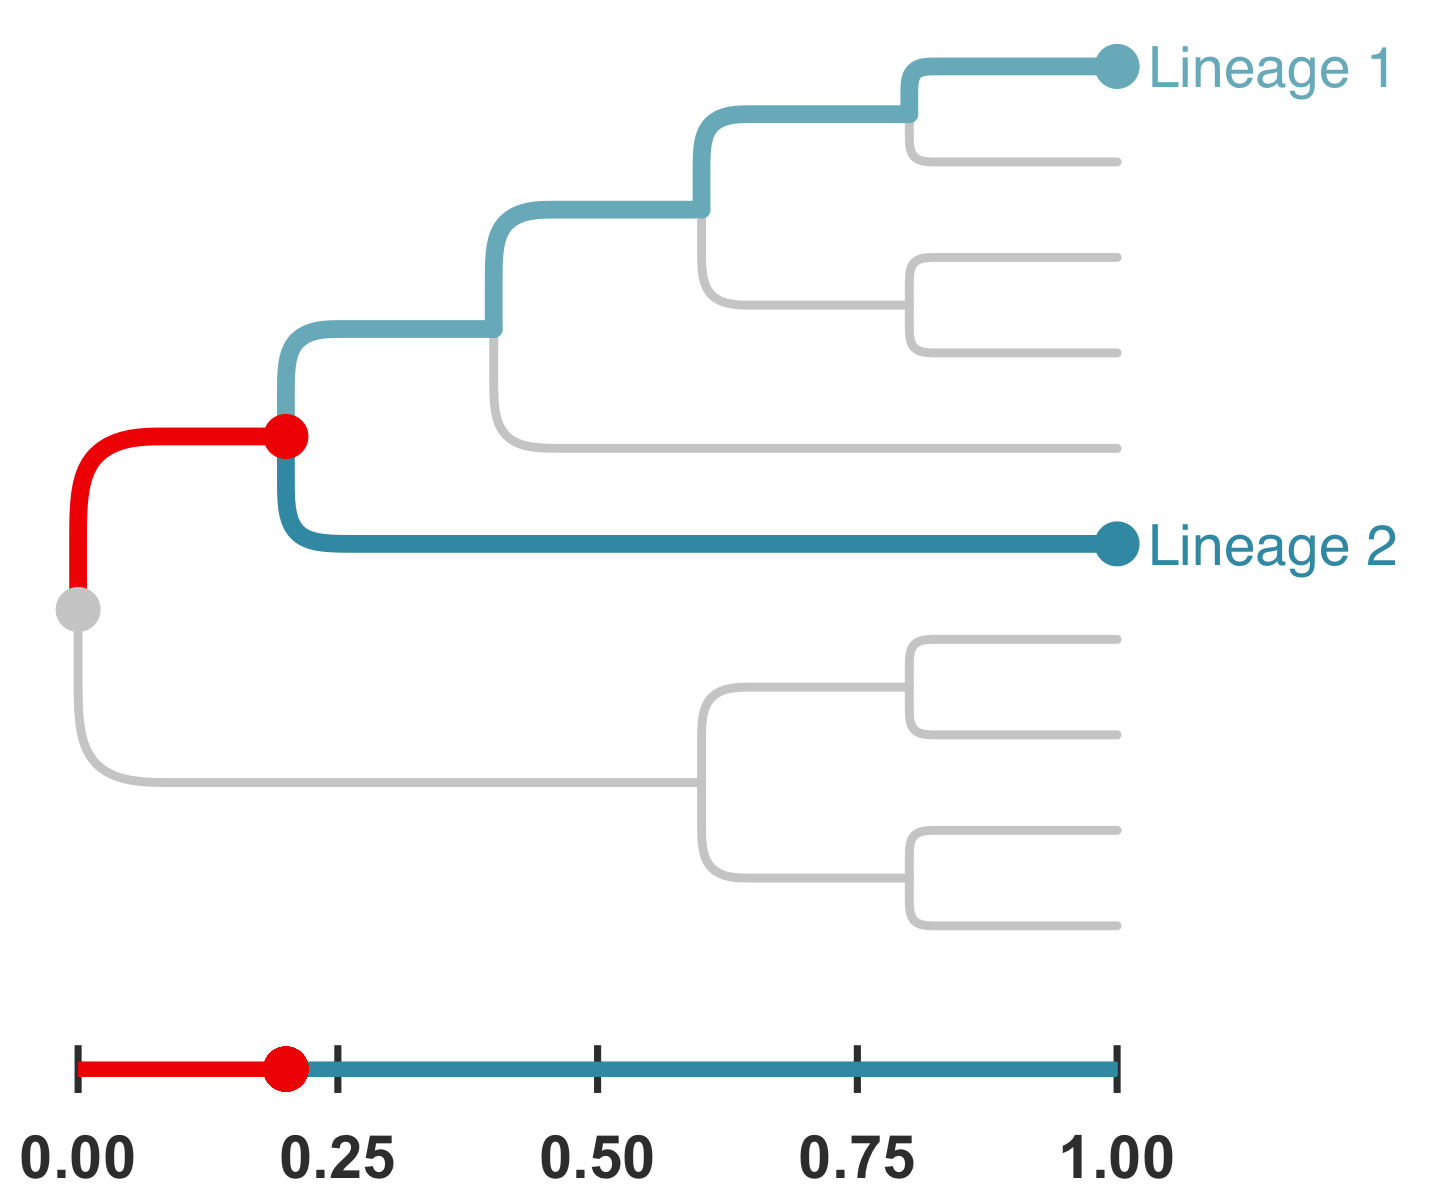

In [113]:
options(repr.plot.width = 12, repr.plot.height = 10)
sample_1 <- "t10"
sample_2 <- "t8"
coal_tree(random_1, sample_1, sample_2)
ggsave("../plots/Figure5/Fig5B1.pdf", width=11, height=11)

### Plotting late divergence

Warning message in fortify.phylo(data, ...):
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."


Warning message in fortify.phylo(data, ...):
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."
Warning message in fortify.phylo(data, ...):
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."
Warning message in fortify.phylo(model, data, layout = layout, yscale = yscale, :
"'edge.length' contains NA values...
## setting 'edge.length' to NULL automatically when plotting the tree..."


[1] 0.8


Warning message in geom_segment(aes(y = -0.5, yend = -0.5, x = 0, xend = mrca_time), :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_segment(aes(y = -0.5, yend = -0.5, x = mrca_time, xend = 1), :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_point(aes(y = -0.5, x = mrca_time), color = wes_palette("Zissou1")[5], :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_segment(aes(y = -0.5, yend = -0.5, x = 0, xend = mrca_time), :
"All aesthetics have length 1, but the data has 19 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_se

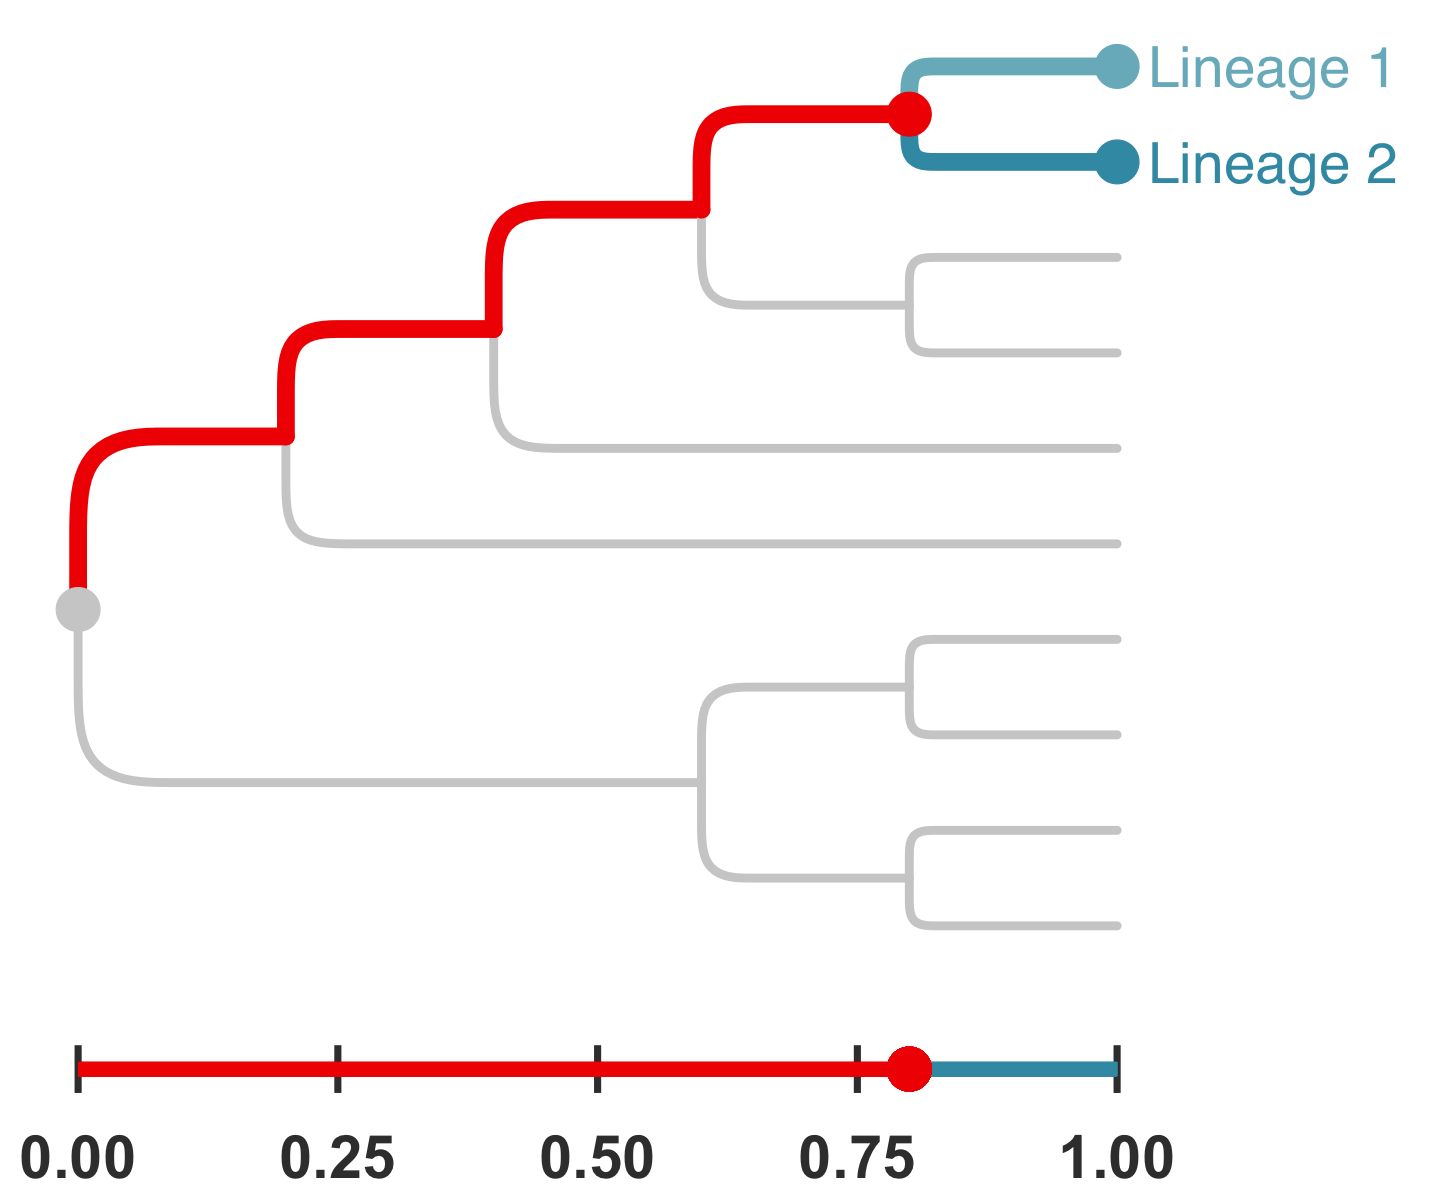

In [114]:
sample_1 <- "t10"
sample_2 <- "t5"
coal_tree(random_1, sample_1, sample_2)
ggsave("../plots/Figure5/Fig5B2.pdf", width=11, height=11)

## Simulating correlations values for *Supplementary note* 

Setting up functions:

In [115]:
# simulating random mutations
simulate_genotype  <- function(cell_divs, mu, markers) {
  
# number of mutations in 50 tracts, with µ=2,500 at x divisions
mutations  <- rpois(markers, mu*cell_divs)
# half of the mutations are deletions, and half are insertions
insertions  <- rbinom(length(mutations), mutations, 0.5)
deletions  <- mutations-insertions  
genotype  <- insertions - deletions
    
return(genotype)
}

## Testing influence of purity and mutation rate

Setting up functions:

In [116]:
# simulating mutations for a pair of samples that diverged after division X
simulate_three_samples_pois  <- function(shared_divs, divs_p1, divs_p2, purity_1, purity_2, mu) {

markers  <- 50
mu  <- 1/mu
    
### genotype for MRCA ###
mrca  <- simulate_genotype(shared_divs, mu, markers)
   
# genotype for sample 1
p1  <- simulate_genotype(divs_p1, mu, markers) 
genotype1  <- (mrca + p1) * purity_1

# genotype for sample 1
p2  <- simulate_genotype(divs_p2, mu, markers) 
genotype2  <- (mrca + p2) * purity_2

suppressWarnings(cor(genotype1, genotype2))
  
}

In [117]:
# going through the different division rations
purity_cor  <- function(ratio, i, n, mu) {
    
    purity_1  <- n$a[i]
    purity_2  <- n$b[i]
    
    divs_mrca <- 1000 * ratio
    divs_samples <- 1000 *(1-ratio)

    r  <- mean(replicate(1000, simulate_three_samples_pois(divs_mrca, divs_samples, divs_samples, purity_1, purity_2, mu)), na.rm=TRUE)
    
    list(ratio=ratio, r=r, mu=mu, purity_1=purity_1, purity_2=purity_2)
    
}

In [118]:
# going through the different mutation rates
ratio_cor <- function(i, n, mu) {
    lapply(seq(0, 1, 0.1), purity_cor, i, n, mu)
}

In [119]:
# going through the different purities
mu_cor <- function(mu, cmb_tbl) {
    cors <- lapply(1:nrow(cmb_tbl), ratio_cor, cmb_tbl, mu)
    bind_rows(cors)
}

Applying simulations

In [120]:
#all purity combinations from 0 to 1 in 0.1 steps
cmb_tbl  <- expand_grid(a=seq(0,1, 0.1), b=seq(0,1, 0.1))
l  <- parallel::mclapply(c(2500, 10000, 25000, 100000), mu_cor, cmb_tbl)
cor <- bind_rows(l)

Setting up function to plot different mutation rates side by side

In [25]:
# plotting the median, 2.5th and 97.5th percentiles
plot_mu <- function(mu_i) {

number <- paste0("mu == ", sub("e", " %*% 10^", format(1 / mu_i, digits = 3, scientific = TRUE)))
cor %>%
        filter(mu == mu_i) %>% 
        group_by(ratio) %>%
        summarize(
                r_med = median(r, na.rm = TRUE),
                low_95 = quantile(r, 0.025, na.rm = TRUE), high_95 = quantile(r, 0.975, na.rm = TRUE)
        ) %>% 
        ggplot(aes(x = ratio, y = r_med)) +
        geom_abline(size = 3, color="#3366FF", linetype=1, alpha=1) +
        geom_errorbar(aes(x = ratio, ymin = low_95, ymax = high_95),
                width = 0.05, size = 3
        ) +
        stat_cor(aes(label = ..r.label..),  
                label.x = 0,
                size=10,
                label.y = 1.1) +
        labs(
        x = "Coalescence ratio", y = "Estimated coalescence ratio") +
        theme_martin() +
        theme(plot.title = element_text(size=32)) +
        scale_y_continuous(breaks = seq(0, 1, 0.5)) +
        scale_x_continuous(breaks=seq(0, 1, 0.5)) +
        coord_cartesian(ylim=c(0,1.15)) +
        ggtitle(parse(text=number))
}

Warning message:
"The dot-dot notation (`..r.label..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(r.label)` instead."


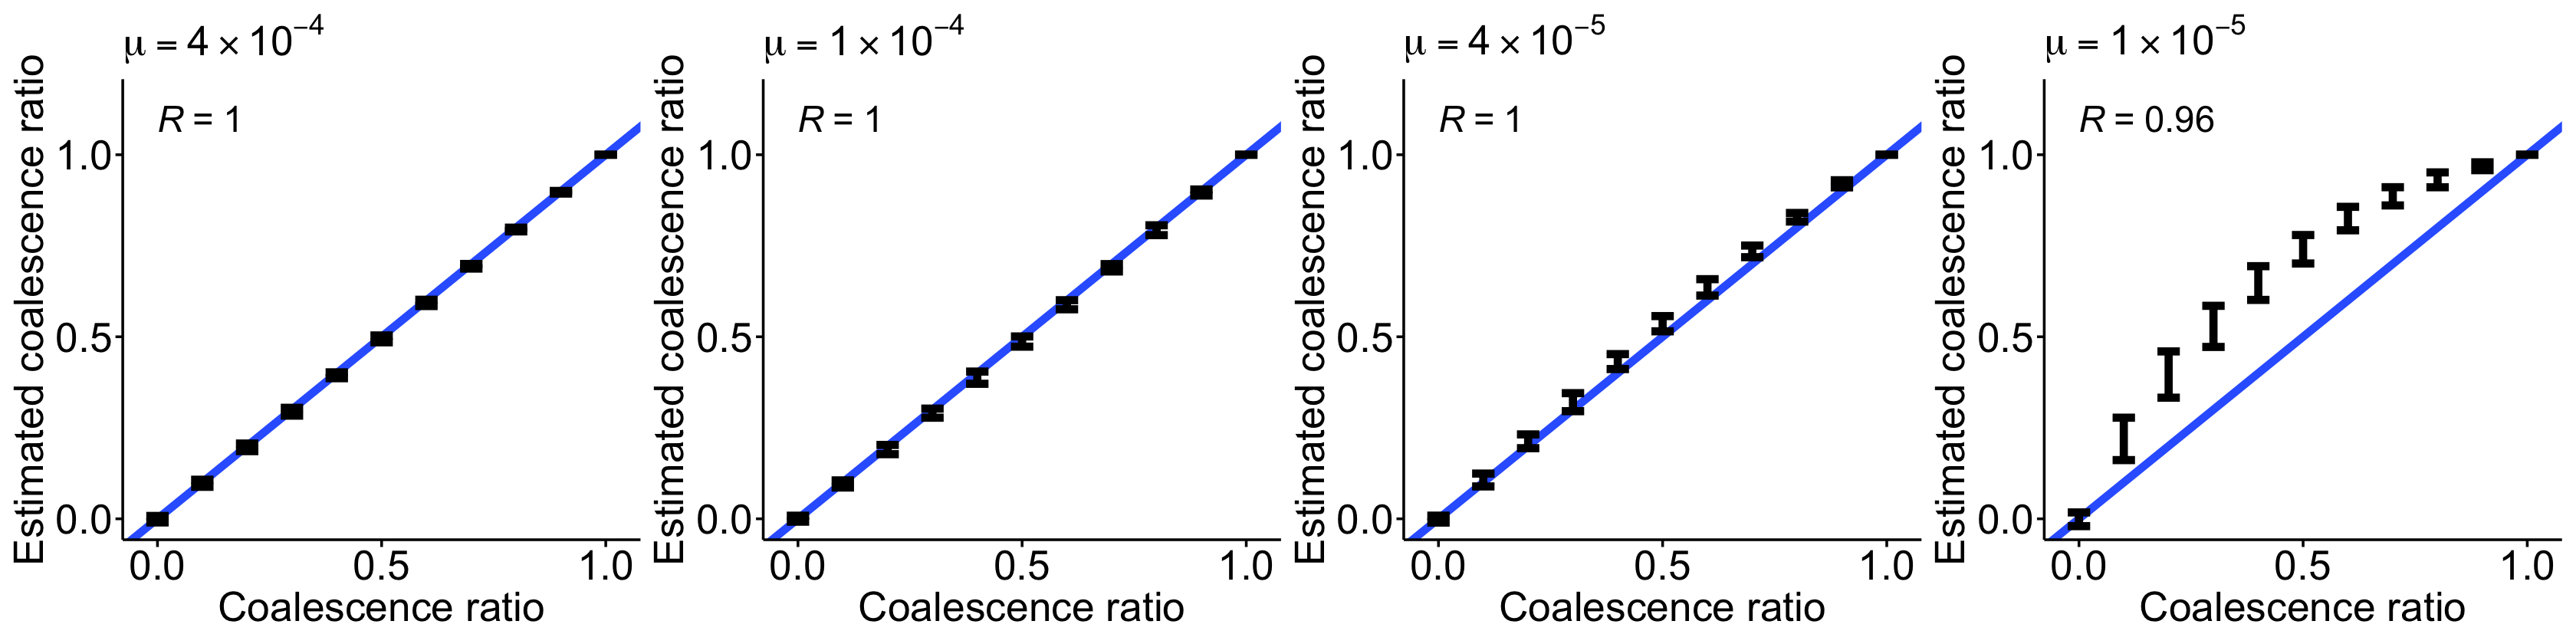

In [26]:
options(repr.plot.width = 28, repr.plot.height = 7)

plot_mu(2500) | plot_mu(10000) | plot_mu(25000) | plot_mu(100000)
ggsave("../plots/Supplementary_figures/cr_simulations.pdf", width=33, height=8)

## Plotting data from real samples

In [121]:
mean_lengths <- read_tsv("../results/lung_markerlengths.tsv")

Rows: 2659 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): sample, marker, subject
dbl (1): length

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [122]:
 # rotating mean length table for heatmap plotting
 filtered_matrix <- mean_lengths %>%
    filter(subject == "TM18") %>%
    select(-subject) %>%
    pivot_wider(names_from = marker, values_from=length)  %>% 
    column_to_rownames("sample")  %>% 
    as.matrix()

In [123]:
# creating clusters and tables for heatmap plotting
rowclust <- hclust(dist(filtered_matrix, method="manhattan"))
colclust <- hclust(dist(t(filtered_matrix), method="manhattan"))
hm <- hmReady(filtered_matrix, colclus = colclust, rowclus = rowclust) 

In [124]:
col_order <- colclust$labels[colclust$order]

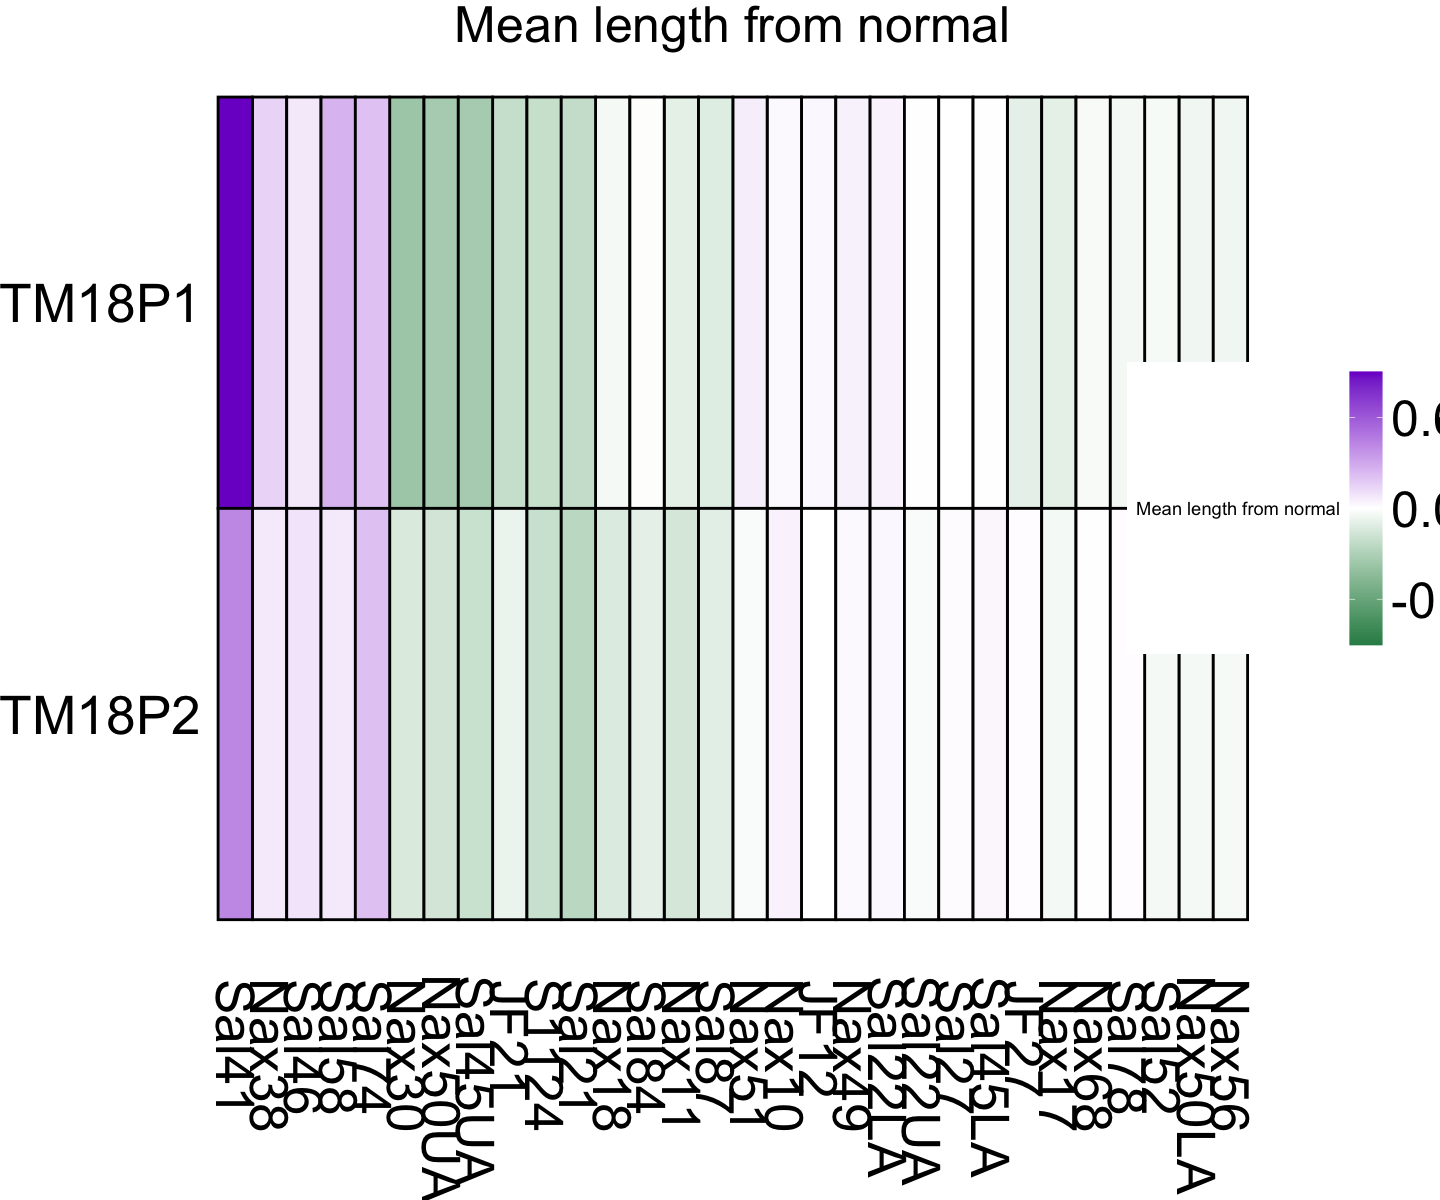

In [125]:
max_value <-  max(abs(hm$value))

mean_lengths %>%
    filter(subject == "TM18", !str_detect(sample, "N")) %>%
    mutate(marker=fct_relevel(marker, col_order), sample=fct_relevel(sample, "TM18P2", "TM18P1")) %>% 
ggplot(aes(marker, sample, fill = length)) +
    geom_tile(color = "black", size=0.8) +
    scale_fill_gradient2(low = "seagreen", mid = "white", high = "purple3", limits = c(-max_value, max_value),
      breaks = c(-0.6, 0, 0.6), guide = guide_colorbar(
                title="Mean length from normal", direction = "vertical",
                title.position = "left", title.hjust=1
    )) +
    theme_martin() +
    theme(axis.title = element_blank(), plot.title = element_text(hjust = 0.5, vjust = 0.5, size=30),
        axis.text.x = element_text(angle = -90, vjust=0.5, hjust=0.05), axis.line.y = element_blank(),
        axis.line.x = element_blank(), axis.ticks.y = element_blank(),
        axis.ticks.x = element_blank(), legend.title = element_blank(),
        legend.position = c(1.06, 0.5), legend.key.height=unit(33, 'pt'),
        legend.text = element_text(size=30), legend.key.width = unit(20, 'pt'),
        plot.margin=unit(c(0,4,0,0),"cm")
    ) +
    labs(title="Mean length from normal")
ggsave("../plots/Figure5/Fig5C2.pdf", width=15, height=5) 


In [126]:
# calculate Pearson's correlation
cor_r <- mean_lengths %>%
    filter(subject == "TM18") %>%
    pivot_wider(names_from = sample, values_from = length) %>%
    rstatix::cor_test(TM18P1, TM18P2) %>%
    mutate(cor=round(cor, 2), cor=ifelse(str_length(cor)<5, paste0("R = ", cor, "0"), paste0("R = ", cor)))  %>% 
    pull(cor)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


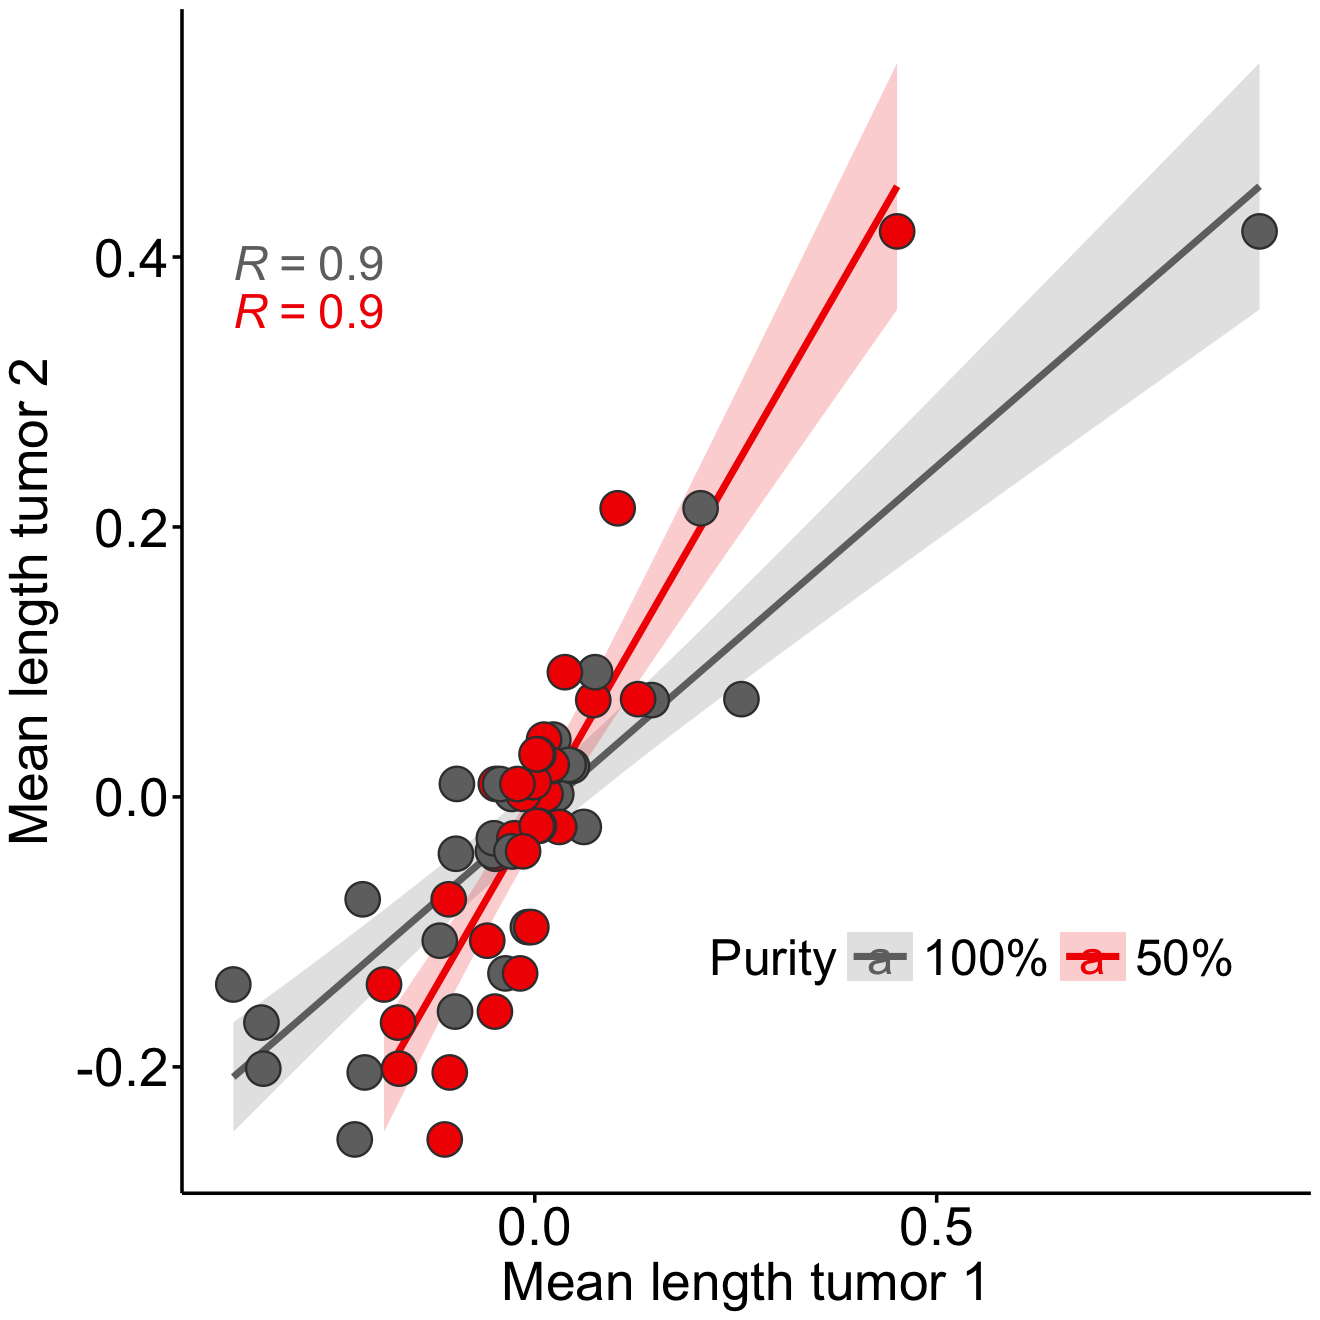

In [127]:
options(repr.plot.width=11, repr.plot.height=11)
mean_lengths %>%
    filter(subject == "TM18") %>%
    pivot_wider(names_from = sample, values_from = length) %>%
    mutate(impure_TM18P1=TM18P1*0.5,impure_TM18P2=TM18P2*1) %>% 
    select(!contains("N")) %>%
    pivot_longer(-c(1, 2), values_to = "length", names_to = "sample") %>%
    mutate(Purity = ifelse(str_detect(sample, "impure"), "50%", "100%"), sample = ifelse(str_detect(sample, "P1"), "P1", "P2")) %>%
    pivot_wider(names_from = sample, values_from = length) %>%
    mutate(Purity=fct_relevel(Purity, "100%", "50%")) %>% 
    ggplot(aes(P1, P2)) +
    geom_smooth(aes(color = Purity, fill = Purity), method = "lm", size = 2, alpha = 0.2) +
    geom_point(aes(fill = Purity),
        size = 9, color = "grey23",
        pch = 21, stroke = 1, show.legend = F
    ) +
    scale_fill_manual(values = c("50%" = wes_palette("Zissou1")[5], "100%" = "grey44"), breaks = c("100%", "50%")) +
        scale_color_manual(values = c("50%" = wes_palette("Zissou1")[5], "100%" = "grey44")) +
        labs(x = "Mean length tumor 1", y = "Mean length tumor 2") +
        theme_martin() +
        stat_cor(aes(label = ..r.label.., color = Purity), size = 10) +
        theme(legend.title = element_text(size=30, hjust=0.5),
        legend.position = c(0.7, 0.2),
         legend.direction = "horizontal",
        legend.text = element_text(size=30), legend.key.width = unit(40, 'pt'),)
    ggsave("../plots/Figure5/Fig5D.pdf", height=11, width=11)

## Cell division and coalescence ratio comparison

In [128]:
lung_mrca_table <- read_tsv("../results/lung_mrca_table.tsv")
cor <- read_tsv("../results/lung_pairwise_l1.tsv")

Rows: 34 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (1): subject
dbl (4): all_mrca, p1_p2_mrca, p1_p3_mrca, p2_p3_mrca

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 117 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (5): a, b, subject, tumor_a, tumor_b
dbl (3): l1, r, marker

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Joining with `by = join_by(subject, tumor_a, tumor_b)`


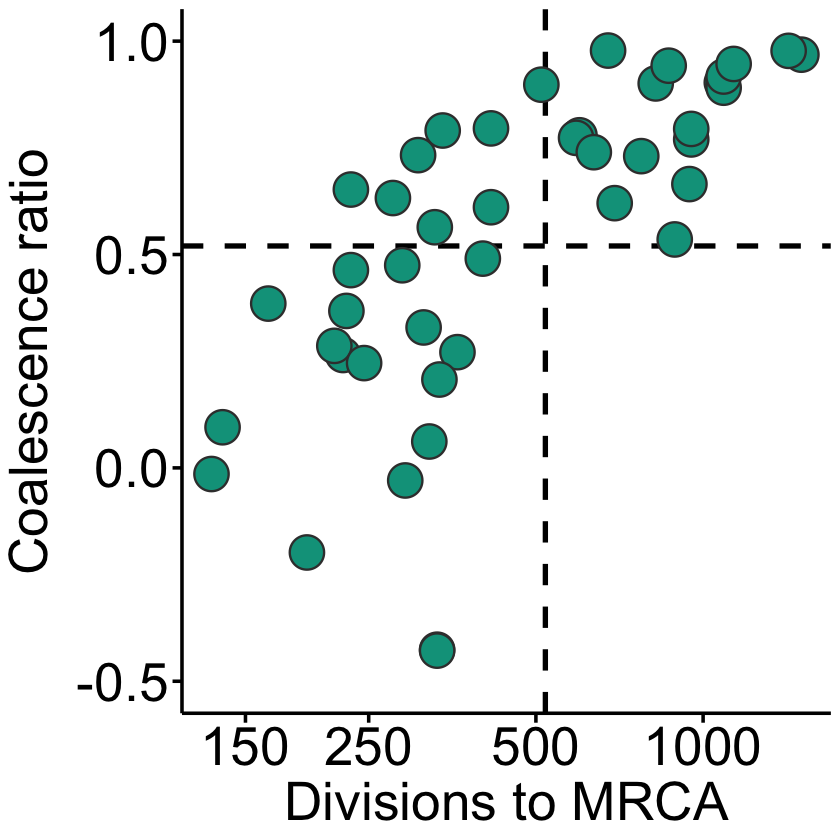

In [129]:
options(repr.plot.width=7, repr.plot.height=7)

lung_mrca_table %>%
      pivot_longer(2:5, names_to = "mrca", values_to = "divs") %>%
      filter(mrca != "all_mrca", !is.na(divs)) %>%
      mutate(
            tumor_a = str_split(mrca, "_") %>% purrr::map(1) %>% toupper(),
            tumor_b = str_split(mrca, "_") %>% purrr::map(2) %>% toupper()
      ) %>%
      select(-mrca) %>%
        left_join(cor) %>%
        select(subject, tumor_a, tumor_b, divs, r) %>%
        rename(divs_to_mrca = divs) %>%
        mutate(pair = paste(subject, tumor_a, tumor_b)) %>%
        ggplot(aes(divs_to_mrca, r)) +
        geom_vline(xintercept = 520, linetype = 2, size = 1.5) +
        geom_hline(yintercept = 0.52, linetype=2, size=1.5) +
        geom_point(
          size = 9, color = "grey23", fill = wes_palette("Darjeeling1")[2],
          pch = 21, stroke = 1, show.legend = FALSE
        ) +
        labs(x = "Divisions to MRCA", y = "Coalescence ratio") +
        scale_x_log10(breaks=c(150, 250,500,1000)) +
        scale_y_continuous(breaks=c(-0.5, 0,0.5,1)) +
        coord_cartesian(ylim=c(-0.5,1)) +
        theme_martin()
ggsave("../plots/Figure5/Fig5E.pdf", width = 11, height = 11)

## Correlation of unrelated tumors

In [130]:
# calculating correlation of sample pairs from different patients
get_correlation <- function(i, x, m) {
  s1 <- x$s1[i]
  s2 <- x$s2[i]

  mean_lengths1 <- as.numeric(m[s1, ])
  mean_lengths2 <- as.numeric(m[s2, ])
  
  # finding only shared markers 
  names(mean_lengths1) <- colnames(m[s1, ])
  mean_lengths1 <- mean_lengths1[!is.na(mean_lengths1)]

  names(mean_lengths2) <- colnames(m[s2, ])
  mean_lengths2 <- mean_lengths2[!is.na(mean_lengths2)]

  shared_markers <- intersect(names(mean_lengths1), names(mean_lengths2))

  mean_lengths1 <- mean_lengths1[shared_markers]
  mean_lengths2 <- mean_lengths2[shared_markers]

  # count on how markers observation the correlation is based
  marker_number <- length(shared_markers)

  # skip analysis it too few markers overlap in the samples
  if (marker_number > 10) {
    r <- cor(mean_lengths1, mean_lengths2, method = "pearson", use = "complete.obs")
    l1 <- sum(abs(mean_lengths1 - mean_lengths2)) / marker_number
    list(a = s1, b = s2, r = r, l1=l1, markers = marker_number)
  }
}


In [131]:
primary_samples <- unique(str_subset(mean_lengths$sample, "P"))
combos_wide <- combn(primary_samples, m= 2)

# make combo table longer
combos_long <- data.frame(s1=as.character(combos_wide[1,]), s2=as.character(combos_wide[2,]))


# remove all combintions where both primaries come from the same patient
x <- combos_long %>% 
    mutate(subject_1=str_remove(s1, "P1|P2|P3"), subject_2=str_remove(s2, "P1|P2|P3")) %>%
    filter(subject_1!=subject_2) %>% 
    dplyr::select(s1, s2) 

m <- mean_lengths %>%
    select(-subject) %>%
    pivot_wider(values_from = length, names_from = marker) %>%
    column_to_rownames("sample")

In [38]:
l <- purrr::map(1:nrow(x), \(i) get_correlation(i, x, m), .progress=TRUE)
interpatient_cor <- bind_rows(l) 

 ===========>-------------------   35% |  ETA:  7s

 ====================>----------   66% |  ETA:  3s

 ==============================>   99% |  ETA:  0s



In [39]:
# saving df
write_tsv(interpatient_cor, "../results/lung_interpatient_cor.tsv")

CRC interpatient coalescence ratio

In [40]:
mean_lengths_crc <- read_tsv("../results/crc_markerlengths.tsv")

Rows: 11683 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): sample, marker, subject
dbl (1): length

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
# get all pairwise (unique) combinations only for primary samples
tumor_samples <- unique(str_subset(mean_lengths_crc$sample, "P|M|L"))
combos_wide <- combn(tumor_samples, m= 2)

# make combo table longer
combos_long <- data.frame(s1=as.character(combos_wide[1,]), s2=as.character(combos_wide[2,]))

# remove all combintions where both primaries come from the same patient
x <- combos_long %>% 
        mutate(subject_1 = str_remove(s1, "[N|P|M|L|Ad][:alnum:]+"), subject_2 = str_remove(s2, "[N|P|M|L|Ad][:alnum:]+")) %>%
    filter(subject_1!=subject_2) %>% 
    dplyr::select(s1, s2) 

m <- mean_lengths_crc %>%
    select(-subject) %>%
    filter(str_detect(sample, "P|M|L")) %>% 
    pivot_wider(values_from = length, names_from = marker) %>%
    column_to_rownames("sample")

In [59]:
l <- parallel::mclapply(1:nrow(x), get_correlation, x, m)
interpatient_cor_crc <- bind_rows(l) 

In [262]:
# saving df
write_tsv(interpatient_cor_crc, "../results/crc_interpatient_cor.tsv")

## Data pre-processing

In [60]:
clin_col_names <- c('subject','ngs_paper_id','sex','age','interval','survival','os','pf_survival','pfs','smoking','p1_size','p2_size','p3_size','n_stage','p1_lobe','p2_lobe','p3_lobe')
clinical_info <- read_xlsx("../data/Supplementary_tables.xlsx", sheet = 1, skip = 2, col_names = clin_col_names)
ngs_data <- read_excel("../data/yang_paper_s3.xlsx")


In [61]:
# processing progression free survival data
pfs_info <- clinical_info %>%
    select(subject, pf_survival, pfs)

In [62]:
# rotating table so that each row features one tumor pair
int_clin <- clinical_info %>%
       select(subject, survival, os, interval, smoking, p1_lobe:p3_lobe, n_stage) %>%
       pivot_longer(p1_lobe:p3_lobe, names_to = "tumor", values_to = "lobe") %>%
       mutate(tumor = str_extract(tumor, "[1-3]")) %>%
       filter(!is.na(lobe))

# finding the size of the largest tumor
size_info <- clinical_info %>%
    select(subject, p1_size:p3_size, age, sex)

clinical_info_pairwise <- int_clin %>%
       select(subject, tumor, lobe) %>%
       rename(tumor_2 = tumor, lobe_2 = lobe) %>%
       left_join(int_clin, relationship = "many-to-many") %>%
       filter(tumor != tumor_2, tumor < tumor_2) %>%
       mutate(
              tumor_a = paste0("P", tumor),
              tumor_b = paste0("P", tumor_2)
       ) %>%
       select(-tumor, -tumor_2) %>%
           left_join(pfs_info) %>%
           left_join(size_info) %>%
           mutate(
               size_a = case_when(tumor_a == "P1" ~ p1_size, tumor_a == "P2" ~ p2_size, tumor_a == "P3" ~ p3_size),
               size_b = case_when(tumor_b == "P1" ~ p1_size, tumor_b == "P2" ~ p2_size, tumor_b == "P3" ~ p3_size)
           ) %>%
           select(-c(p1_size, p2_size, p3_size)) %>%
       mutate(size = pmax(size_a, size_b), 
        id=paste(subject, tumor_a, tumor_b), 
        interval = ifelse(tumor_a=="P2" & tumor_b=="P3", 0, interval)) 

Joining with `by = join_by(subject)`


Joining with `by = join_by(subject)`
Joining with `by = join_by(subject)`


In [63]:
# reading in correlation data
cor <- read_tsv("../results/lung_pairwise_l1.tsv")

Rows: 117 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (5): a, b, subject, tumor_a, tumor_b
dbl (3): l1, r, marker

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [64]:
# joining clinical and correlation data
clinical_cor <-  cor %>%
    left_join(clinical_info_pairwise)

Joining with `by = join_by(subject, tumor_a, tumor_b)`


## Data analysis

The interpatient correlation is used to estimate the correlation of unrelated samples. The correlation between primary tumor and mets in the colorectal cancer cohorts will be used to give an expectation of how related a primary tumor - metastasis pair is.

In [65]:
interpatient_cor <- read_tsv("../results/lung_interpatient_cor.tsv")

Rows: 1973 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (2): a, b
dbl (3): r, l1, markers

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [66]:
crc_cor <- read_tsv("../results/crc_pairwise_l1.tsv") %>%
    filter((str_detect(a, "P") & str_detect(b, "M")) | (str_detect(a, "M") & str_detect(b, "P"))) %>%
    mutate(cohort="crc")

Rows: 3588 Columns: 6
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (2): a, b
dbl (4): l1, r, marker, divs

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [67]:
# combining all tables to plot
combined_table <- bind_rows(
    crc_cor, (interpatient_cor %>%
        mutate(cohort = "inter")),
    clinical_cor %>% mutate(cohort = "intra")
) %>%
    mutate(
        status = ifelse(r > 0.52, "met", "ind"),
        cohort = fct_relevel(cohort, list("inter", "crc", "intra"))
    ) %>%
    filter(!is.na(status))

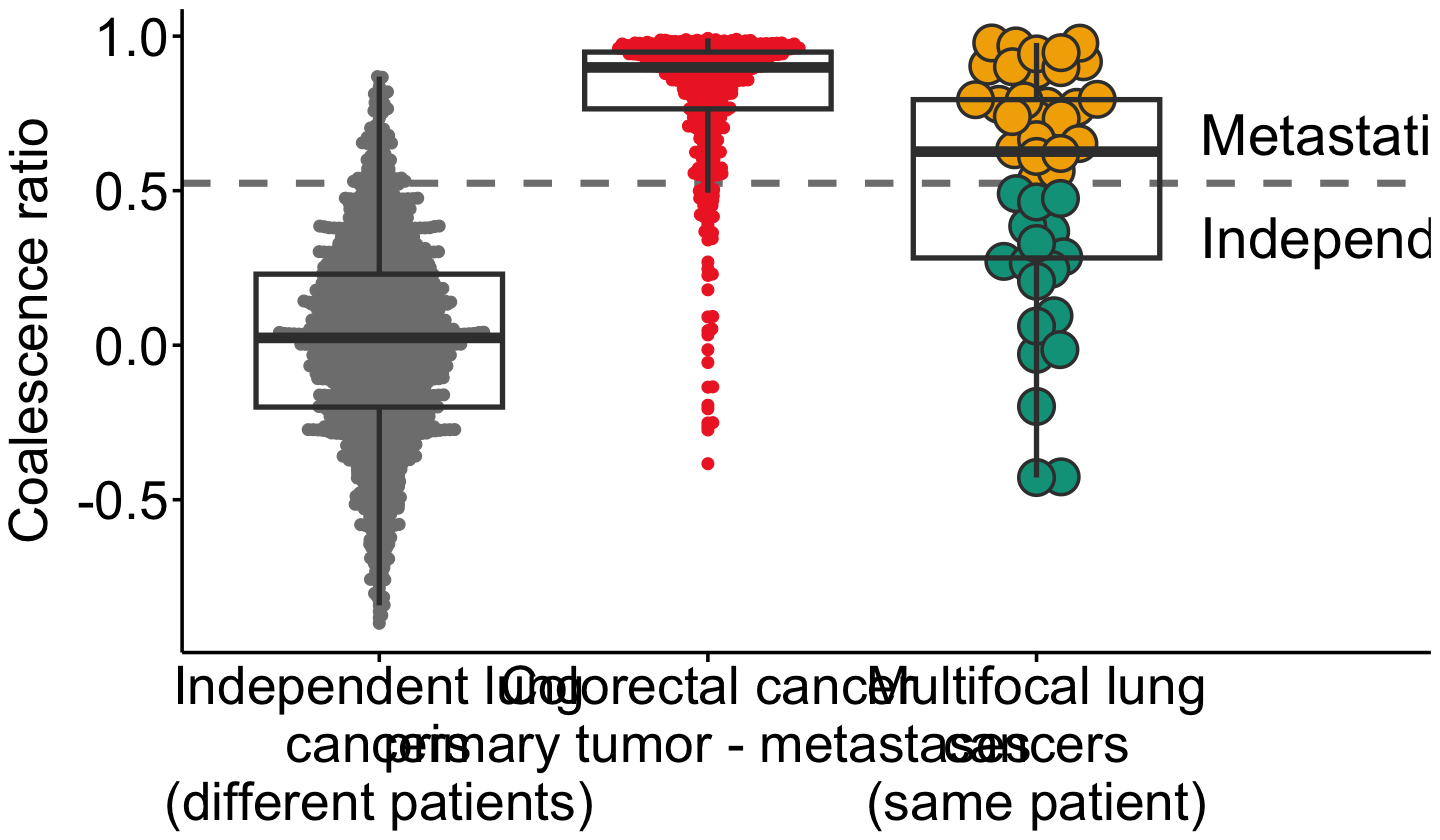

In [68]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(combined_table, aes(cohort, r, color = cohort)) +
  geom_blank() +
  geom_hline(aes(
    yintercept =
      quantile(filter(combined_table, cohort == "inter")$r, 0.95, na.rm = TRUE)
  ),
  color = "grey50", size = 2, linetype = "dashed"
  ) +
  geom_beeswarm(data=filter(combined_table, cohort!="intra"), cex=0.5, size=3) +
  geom_beeswarm(data=filter(combined_table, cohort=="intra"), aes(fill=status), cex=2.5, size=9, color="grey23",
                    pch=21, stroke=1.5, show.legend = FALSE)+
  geom_boxplot(data = combined_table, outlier.alpha = 0, alpha = 0, size = 1.5, color = "grey23") +
  annotate("text", label = "Metastatic", x = 3.5, y = 0.75, size = 12, hjust=0, vjust=1) +
  annotate("text", label = "Independent", x = 3.5, y = 0.35, size = 12, hjust=0, vjust=0.5) +
  scale_fill_manual(values = c("ind" = wes_palette("Darjeeling1")[2], "met" = wes_palette("Darjeeling1")[3])) +
  scale_color_manual(values = c( "grey50", "firebrick2", wes_palette("Zissou1")[2]), name = NULL, guide = "none") +
  scale_x_discrete(labels = c("Independent lung\ncancers\n(different patients)", "Colorectal cancer\nprimary tumor - metastases", "Multifocal lung\ncancers\n(same patient)")) +
  labs(y = "Coalescence ratio") +
  coord_cartesian(xlim=c(1,3.6)) +
  theme_martin() +
  theme(axis.title.x=element_blank(), axis.title.y = ggtext::element_markdown()) 

ggsave("../plots/Figure5/Fig5F.pdf", height=11, width=21)

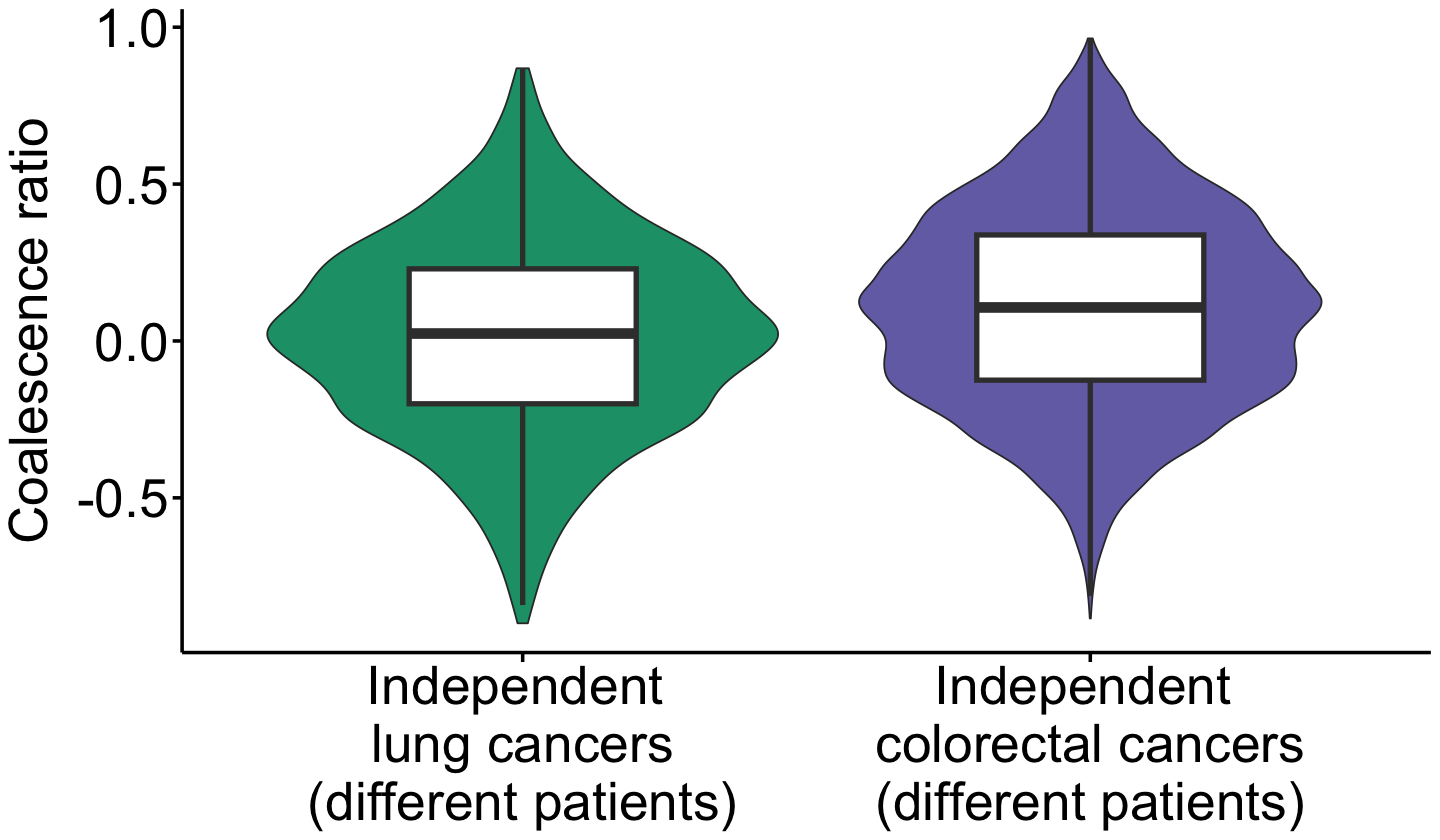

In [69]:
interpatient_tbl <- bind_rows(mutate(interpatient_cor_crc, cohort = "CRC"), (mutate(interpatient_cor, cohort = "LUAD"))) %>%
  mutate(cohort=fct_relevel(cohort, "LUAD", "CRC"))

interpatient_tbl %>%
  ggplot(aes(cohort, r, fill = cohort)) +
  geom_violin() +
  geom_boxplot(outlier.alpha = 0, width=0.4, size = 1.5, color = "grey23", fill="white") +
  scale_fill_manual(values = c("CRC" = "#7570B3", "LUAD" = "#1B9E77"), guide = "none") +
  scale_x_discrete(labels = c("Independent \nlung cancers\n(different patients)", "Independent \ncolorectal cancers\n(different patients)")) +
  labs(y = "Coalescence ratio") +
  theme_martin() +
  theme(axis.title.x = element_blank(), axis.title.y = ggtext::element_markdown())
ggsave("../plots/Figure5/ExtDataFig8A.pdf", height=11, width=10)

## Survival analysis

In [70]:
# transforming data for easier analysis
status <- clinical_cor %>%
    filter(!is.na(lobe), !is.na(r)) %>%
    mutate(location = case_when(
        lobe == lobe_2 ~ "Same lobe",
        str_sub(lobe, start = 1, end = 1) == str_sub(lobe_2, start = 1, end = 1) ~ "Same lung",
        TRUE ~ "Other lung"
    ), location=fct_relevel(location, "Same lobe", "Same lung", "Other lung"),
    status = ifelse(r > 0.52, "met", "ind")) %>% 
    group_by(subject) %>%
    slice_max(r) %>%
    mutate(
        status = ifelse(r > 0.52, "met", "ind"), n_yes = ifelse(n_stage == 0, "Absent", "Present")
    )

# creating overall survival km
osurv <- status %>% 
  surv_fit(Surv(os, survival) ~ status, data=.) 

# creating progression free survival km
pfsurv <- status %>% 
  surv_fit(Surv(pfs, pf_survival) ~ status, data=.) 

In [71]:
# converting the km model into a table for plotting 
plot_pfs_data <-  fortify(pfsurv, surv.connect = TRUE)

# calculating a log rank p-value from the model
pval <- surv_pvalue(pfsurv)$pval

# creating the KM curve
pfs_km <- ggplot(plot_pfs_data, aes(time, surv)) +
   geom_step(aes(color = strata), size = 4) +
   geom_point(
      data = subset(plot_pfs_data, n.censor > 0), aes(color = strata),
      shape = 3, stroke = 4, size=2.5
   ) +
   annotate("text", 15,0.05,label=ifelse(pval<0.001, "p < 0.001", paste0("p = ", round(pval, 3))), size=10) +
    coord_cartesian(ylim = c(0, 1)) +
       scale_x_continuous(breaks = seq(0, 100, 25)) +
       scale_color_manual(values = c(met = wes_palette("Darjeeling1")[3], ind = wes_palette("Darjeeling1")[2]), guide = "none") +
       # scale_linetype_discrete(name = "sex", labels = c("XX", "YY")) +
       labs(y = "Progression free survival") +
       theme_martin() +
       theme(
          axis.line.x = element_line(size = 2),
          axis.ticks.x = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_text(vjust = -15)
       )

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


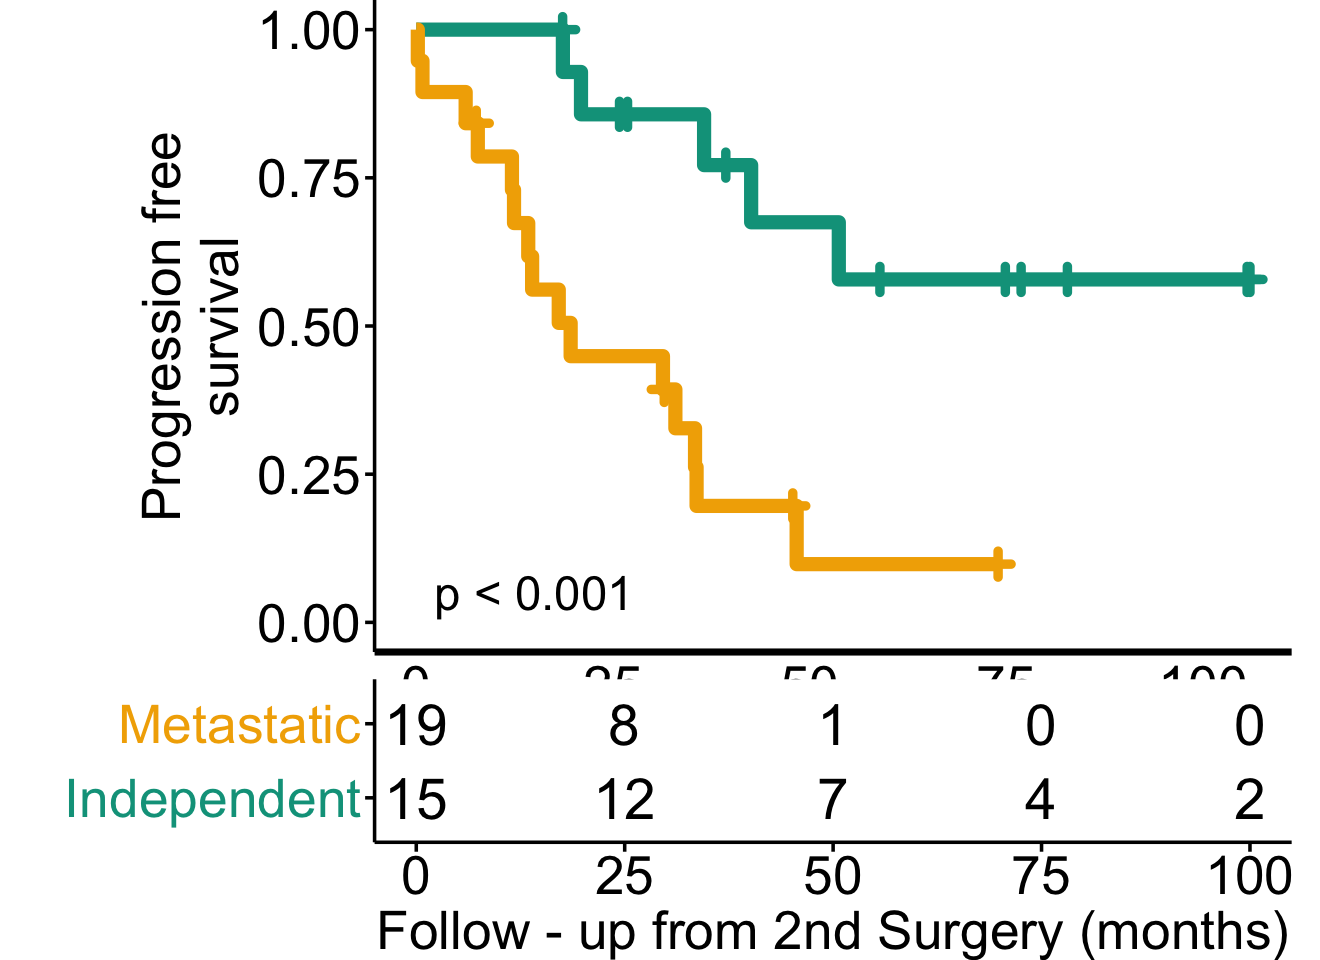

In [72]:
options(repr.plot.width = 11, repr.plot.height = 8)

pfs_km <- pfs_km +
   labs(y="Progression free\nsurvival", x="Follow-up from definitive surgery")

# adding risk table 
pfs_risk_table <- plot_pfs_data %>%
   mutate(time = cut(time, seq(0, 125, 25), include.lowest = TRUE, labels = seq(0, 100, 25))) %>%
   group_by(strata, time) %>%
   slice_max(n.risk, with_ties = FALSE) %>%
   select(n.risk, time, strata) %>% 
   pivot_wider(values_from = n.risk, names_from = time) %>% 
   replace(is.na(.), 0) %>%
   pivot_longer(-strata, names_to = "time", values_to = "n") %>%
   mutate(time = as.integer(time), strata = fct_relevel(strata, "ind", "met")) %>%
   ggplot(aes(time, strata)) +
   geom_text(aes(label = n), size = 12) +
   scale_y_discrete(labels = c(ind = "Independent", met = "Metastatic")) +
   labs(x = "Follow - up from 2nd Surgery (months)") +
   theme_martin() +
   theme(axis.title.y = element_blank(), axis.text.y = element_text(color = c(
      wes_palette("Darjeeling1")[2],
      wes_palette("Darjeeling1")[3]
   )))

# combining risk table and km curves directly onto each other 
(pfs_km / plot_spacer() / pfs_risk_table) +
   patchwork::plot_layout(
      ncol = 1, nrow = 3,
      heights = c(4, -0.22, 1)
   ) &
   theme(plot.margin = unit(c(0, 0.3, 0, -1), "cm"))

ggsave("../plots/Figure5/Fig5G.pdf",
       height=11, width=16)  

Overall survival

In [73]:
# converting the km model into a table for plotting 
plot_os_data <-  fortify(osurv, surv.connect = TRUE)

# calculating a log rank p-value from the model
pval <- surv_pvalue(osurv)$pval

# creating the KM curve
os_km <- ggplot(plot_os_data, aes(time, surv)) +
   geom_step(aes(color = strata), size = 4) +
   geom_point(
      data = subset(plot_os_data, n.censor > 0), aes(color = strata),
      shape = 3, stroke = 4, size=2.5
   ) +
   annotate("text", 15,0.05,label=ifelse(pval<0.001, "p < 0.001", paste0("p = ", round(pval, 3))), size=10) +
    coord_cartesian(ylim = c(0, 1)) +
       scale_x_continuous(breaks = seq(0, 100, 25)) +
       scale_color_manual(values = c(met = wes_palette("Darjeeling1")[3], ind = wes_palette("Darjeeling1")[2]), guide = "none") +
       # scale_linetype_discrete(name = "sex", labels = c("XX", "YY")) +
       labs(y = "Progression free survival") +
       theme_martin() +
       theme(
          axis.line.x = element_line(size = 2),
          axis.ticks.x = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_text(vjust = -15)
       )

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


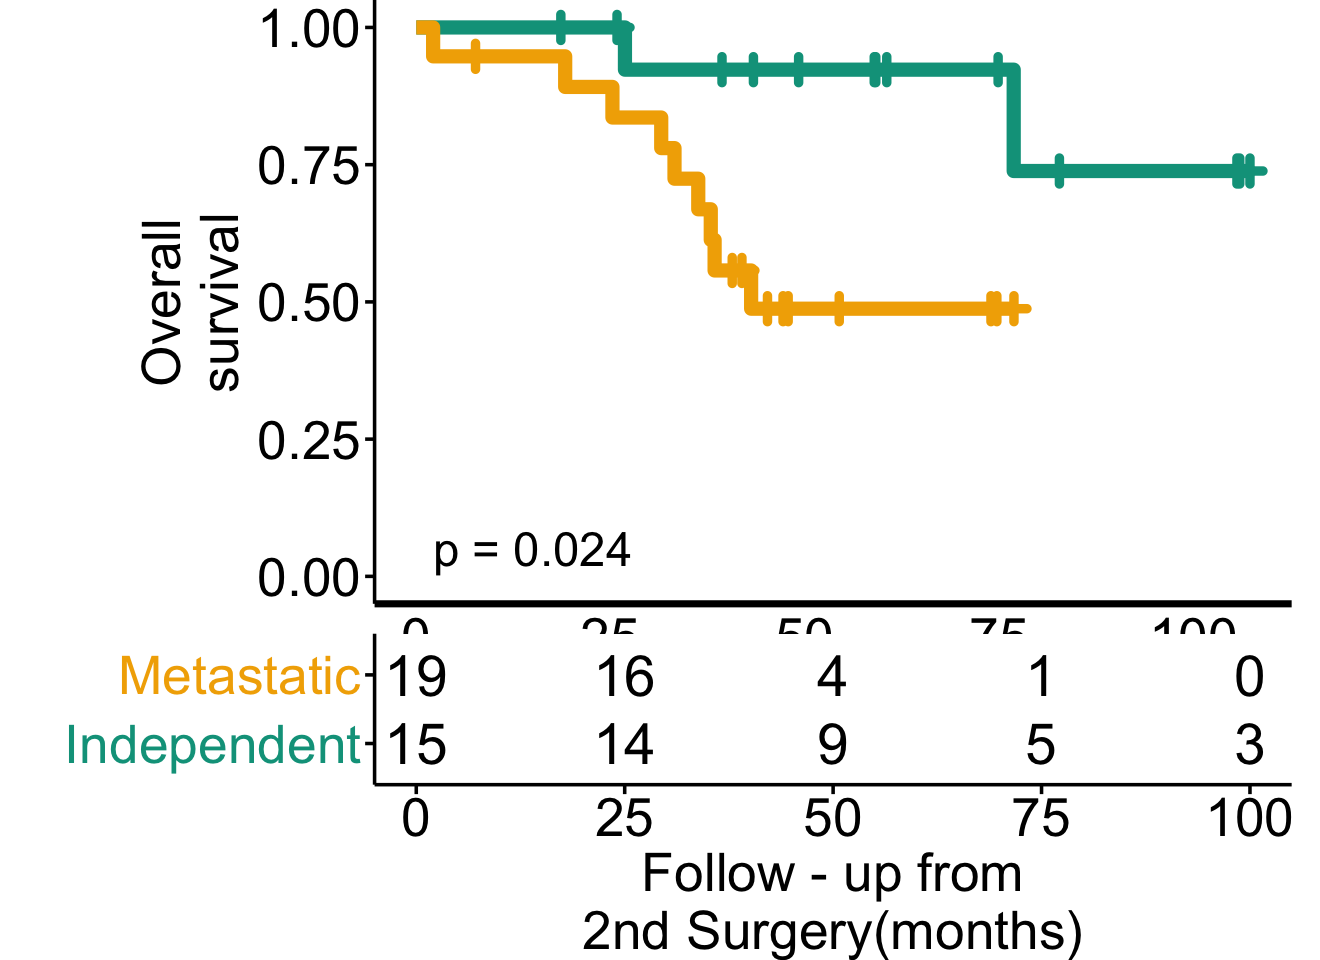

In [74]:
# adding risk table 

os_km <- os_km +
   labs(y="Overall\nsurvival")

os_risk_table <- plot_os_data %>%
   mutate(time = cut(time, seq(0, 125, 25), include.lowest = TRUE, labels = seq(0, 100, 25))) %>%
   group_by(strata, time) %>%
   slice_max(n.risk, with_ties = FALSE) %>%
   select(n.risk, time, strata) %>% 
   pivot_wider(values_from = n.risk, names_from = time) %>% 
   replace(is.na(.), 0) %>%
   pivot_longer(-strata, names_to = "time", values_to = "n") %>%
   mutate(time = as.integer(time), strata = fct_relevel(strata, "ind", "met")) %>%
   ggplot(aes(time, strata)) +
   geom_text(aes(label = n), size = 12) +
   scale_y_discrete(labels = c(ind = "Independent", met = "Metastatic")) +
   labs(x = "Follow - up from\n2nd Surgery(months)") +
   theme_martin() +
   theme(axis.title.y = element_blank(), axis.text.y = element_text(color = c(
      wes_palette("Darjeeling1")[2],
      wes_palette("Darjeeling1")[3]
   )))

# combining risk table and km curves directly onto each other 
(os_km / plot_spacer() / os_risk_table) +
   patchwork::plot_layout(
      ncol = 1, nrow = 3,
      heights = c(4, -0.22, 1)
   ) &
   theme(plot.margin = unit(c(0,0.3,0,-1), "cm"))

ggsave("../plots/Figure5/Extended_Data_Fig8B.pdf",
       height=11, width=9)  

Analyzing survival in patients where CR and L1 didn't agree

In [75]:
status_l1_split <- lung_mrca_table %>%
      pivot_longer(2:5, names_to = "mrca", values_to = "divs") %>%
      filter(mrca != "all_mrca", !is.na(divs)) %>%
      mutate(
            tumor_a = str_split(mrca, "_") %>% purrr::map(1) %>% toupper(),
            tumor_b = str_split(mrca, "_") %>% purrr::map(2) %>% toupper()
      ) %>%
      select(-mrca) %>%
          left_join(clinical_cor) %>%
          filter(!is.na(lobe), !is.na(r)) %>%
          mutate(
              location = case_when(
                  lobe == lobe_2 ~ "Same lobe",
                  str_sub(lobe, start = 1, end = 1) == str_sub(lobe_2, start = 1, end = 1) ~ "Same lung",
                  TRUE ~ "Other lung"
              ), location = fct_relevel(location, "Same lobe", "Same lung", "Other lung")
          ) %>% 
        group_by(subject) %>%
        mutate(divs = max(divs), r = max(r)) %>% 
        select(subject, divs, r, os, survival, pfs, pf_survival) %>%
        distinct() %>% 
    mutate(
        status = case_when(
            (divs > 520 & r > 0.52) ~ "both_met", (divs < 520 & r > 0.52) ~ "only_cr_met",
            (divs > 520 & r < 0.52) ~ "only_divs_met", (divs < 520 & r < 0.52)  ~ "both_ind"
        )
    )  

# creating progression free survival km
pfsurv_l1_split <- status_l1_split %>% 
  surv_fit(Surv(pfs, pf_survival) ~ status, data=.) 

Joining with `by = join_by(subject, tumor_a, tumor_b)`


In [76]:
zero_point_split <- fortify(pfsurv_l1_split) %>%
    group_by(strata) %>% 
    mutate(across(c(time:n.censor, std.err), ~0),
           across(c(surv, upper, lower), ~1)
    ) %>% 
    distinct()

In [77]:
# getting p-value for pairwise combination
p_value_tbl <- status_l1_split %>%
    pairwise_survdiff(Surv(pfs, pf_survival) ~ status, data = .) %>%
    tidy() %>%
    mutate(
        across(1:2, ~ case_match(.x, "both_met" ~ "Both Met", "both_ind" ~ "Both Ind", "only_cr_met" ~ "Only CR Met")),
        p.value = p_round(p.value, 3)
    ) %>%
    pivot_wider(names_from = group2, values_from = p.value)

In [78]:
# converting the km model into a table for plotting 
plot_pfs_data <-  fortify(pfsurv_l1_split) %>%
   group_by(strata) %>%
   bind_rows(zero_point_split) %>% 
    mutate(n.risk=ifelse(n.event == 0 & n.censor == 0, max(n.risk), n.risk))

# calculating a log rank p-value from the model
pval <- surv_pvalue(pfsurv_l1_split)$pval

# creating the KM curve
pfs_km <- ggplot(plot_pfs_data, aes(time, surv)) +
   geom_step(aes(color = strata), size = 4) +
   geom_point(
      data = subset(plot_pfs_data, n.censor > 0), aes(color = strata),
      shape = 3, stroke = 4, size=2.5
   ) +
   annotation_custom(tableGrob(p_value_tbl), xmin=13, xmax=20, ymin=0, ymax=0.3)  +
    coord_cartesian(ylim = c(0, 1)) +
       scale_x_continuous(breaks = seq(0, 100, 25)) +
       scale_color_manual(values = c(only_cr_met = wes_palette("Darjeeling1")[4], both_met = wes_palette("Darjeeling1")[3], both_ind = wes_palette("Darjeeling1")[2]), guide = "none") +
       labs(y = "Progression free survival") +
       theme_martin() +
       theme(
          axis.line.x = element_line(size = 2),
          axis.ticks.x = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_text(vjust = -15)
       )

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


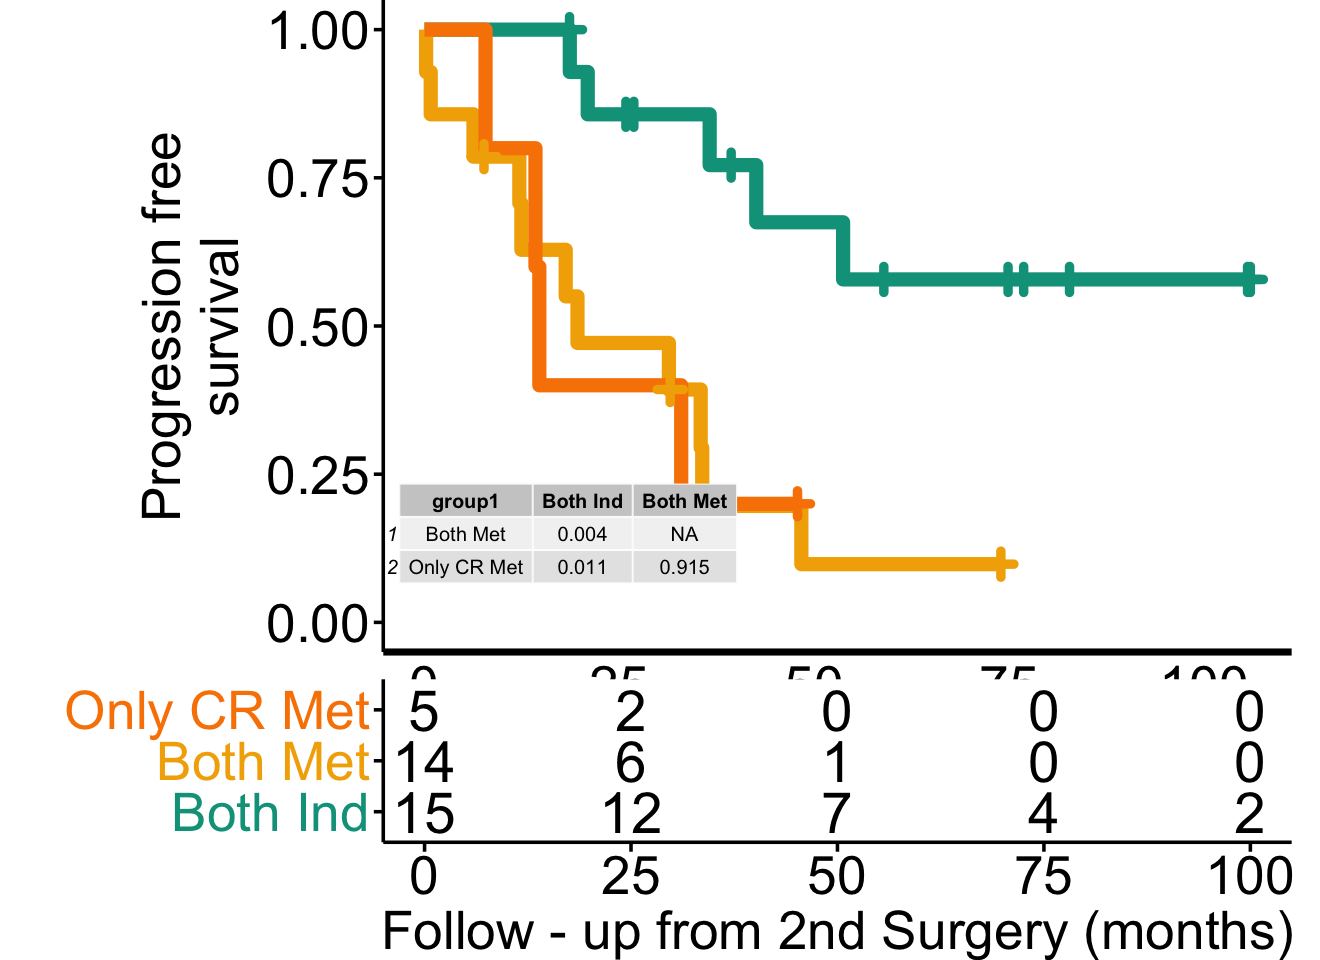

In [79]:
pfs_km <- pfs_km +
   labs(y="Progression free\nsurvival", x="Follow-up from definitive surgery")

# adding risk table 
pfs_risk_table <- plot_pfs_data %>%
   mutate(time = cut(time, seq(0, 125, 25), include.lowest = TRUE, labels = seq(0, 100, 25))) %>%
   group_by(strata, time) %>%
   slice_max(n.risk, with_ties = FALSE) %>%
   select(n.risk, time, strata) %>% 
   pivot_wider(values_from = n.risk, names_from = time) %>% 
   replace(is.na(.), 0) %>%
   pivot_longer(-strata, names_to = "time", values_to = "n") %>%
   mutate(time = as.integer(time)) %>%
   ggplot(aes(time, strata)) +
   geom_text(aes(label = n), size = 12) +
   scale_y_discrete(labels = c(only_cr_met = "Only CR Met", both_met = "Both Met", both_ind = "Both Ind")) +
   labs(x = "Follow - up from 2nd Surgery (months)") +
   theme_martin() +
   theme(axis.title.y = element_blank(), axis.text.y = element_text(color = c(
      wes_palette("Darjeeling1")[2],
      wes_palette("Darjeeling1")[3],
      wes_palette("Darjeeling1")[4]
   )))

# combining risk table and km curves directly onto each other 
(pfs_km / plot_spacer() / pfs_risk_table) +
   patchwork::plot_layout(
      ncol = 1, nrow = 3,
      heights = c(4, -0.22, 1)
   ) &
   theme(plot.margin = unit(c(0, 0.3, 0, -1), "cm"))
ggsave("../plots/Figure5/Extended_Data_Fig8C.pdf", height=11, width=18)

Survival based on different CR cut offs

Progression free survival

In [80]:
p_cor_pfs  <- function(r_tested, cor_table) {
    
    status <- cor_table %>%
        mutate(status=ifelse(r<r_tested, "SPLC", "IPM"))
    
    surv <- status %>%
        surv_fit(Surv(pfs, pf_survival) ~ status, data = .)
    
    p  <- surv  %>% 
    surv_pvalue()  %>% 
    pull(pval)
 
    ipm_ratio  <- surv$strata[1]/(surv$strata[2]+surv$strata[1])
    
l  <- list(p_value=p, r=r_tested, imp_ratio=ipm_ratio)   
    
}

In [81]:
# suppressed warnings because function gives an error if all patients are classified into one group
rlist_pfs <- suppressWarnings(lapply(seq(-1, 1, 0.01), p_cor_pfs, status))
rtable_pfs  <- bind_rows(rlist_pfs)

Warning message:
"The `trans` argument of `sec_axis()` is deprecated as of ggplot2 3.5.0.
i Please use the `transform` argument instead."


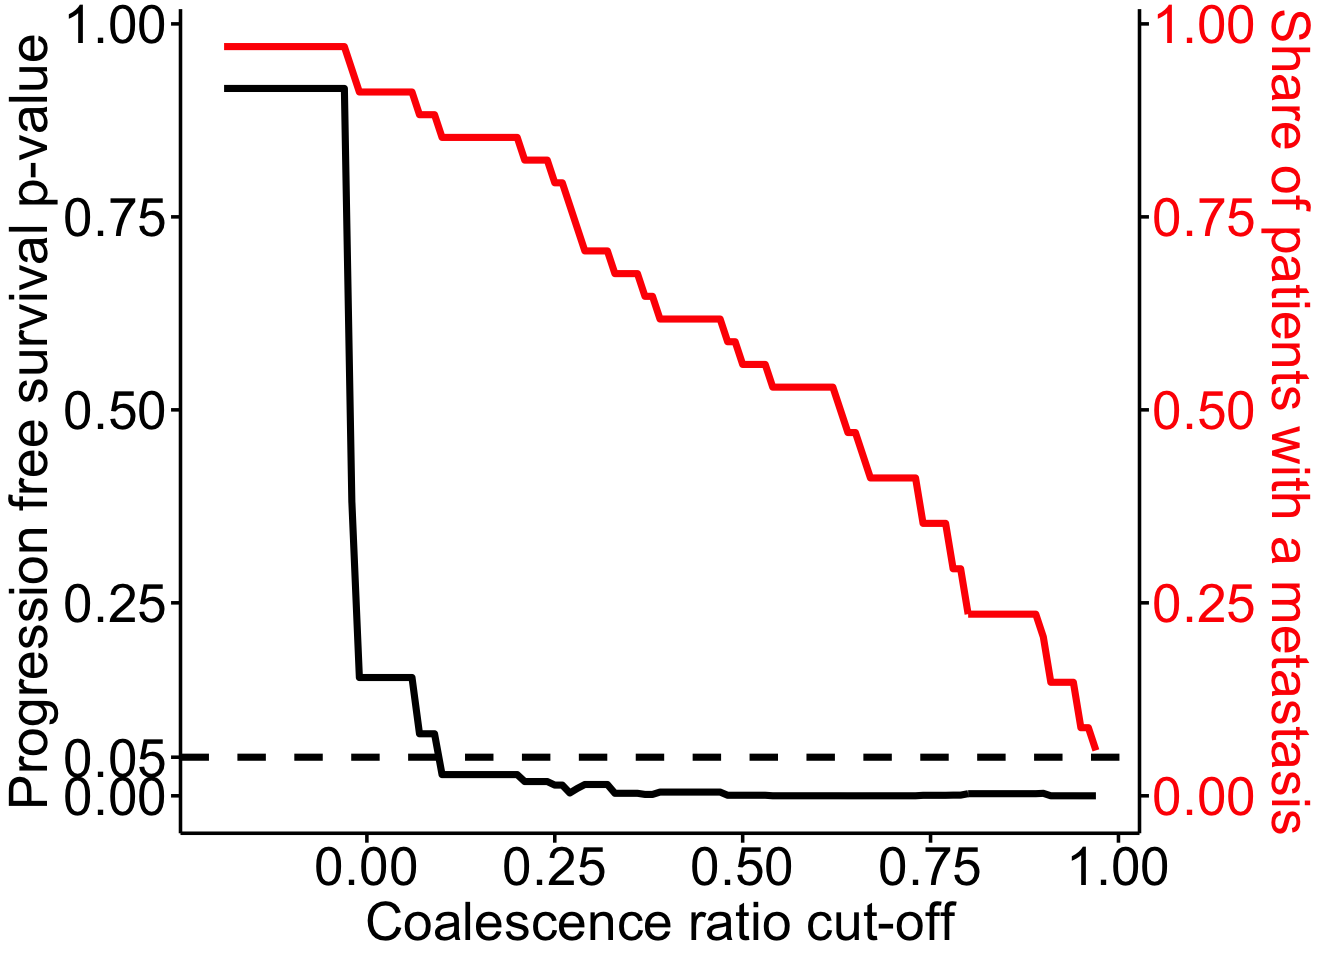

In [82]:
rtable_pfs %>%
  ggplot(aes(r, p_value)) +
  geom_line(aes(r, imp_ratio), color = "red", size = 2) +
  geom_line(size = 2) +
  geom_hline(yintercept = 0.05, linetype=2, size=2) +
  scale_y_continuous(
    # annotate p-value of 0.05 
    breaks = c(0, 0.05, 0.25, 0.5, 0.75, 1),
    
    # Features of the first axis
    name = "Progression free survival p-value",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(trans=~.*1, name="Share of patients with a metastasis")
  ) +
    labs(x="Coalescence ratio cut-off") +
    theme_martin() +
    theme(axis.title.y.right = element_text(color = "red"), axis.text.y.right = element_text(color = "red")) 
ggsave("../plots/Figure5/Extended_Data_Fig8D.pdf", height=11, width=18)

Progression free survival

In [83]:
p_cor_os  <- function(r_tested, cor_table) {
    
    status <- cor_table %>%
        mutate(status=ifelse(r<r_tested, "SPLC", "IPM"))
    
    surv  <-  status %>% 
    surv_fit(Surv(os, survival) ~ status, data=.)
    
    p  <- surv  %>% 
    surv_pvalue()  %>% 
    pull(pval)
 
    ipm_ratio  <- surv$strata[1]/(surv$strata[2]+surv$strata[1])
    
l  <- list(p_value=p, r=r_tested, imp_ratio=ipm_ratio)   
    
}

In [84]:
# suppressed warnings because function gives an error if all patients are classified into one group
rlist <- suppressWarnings(lapply(seq(-1, 1, 0.01), p_cor_os, status))
rtable  <- bind_rows(rlist)

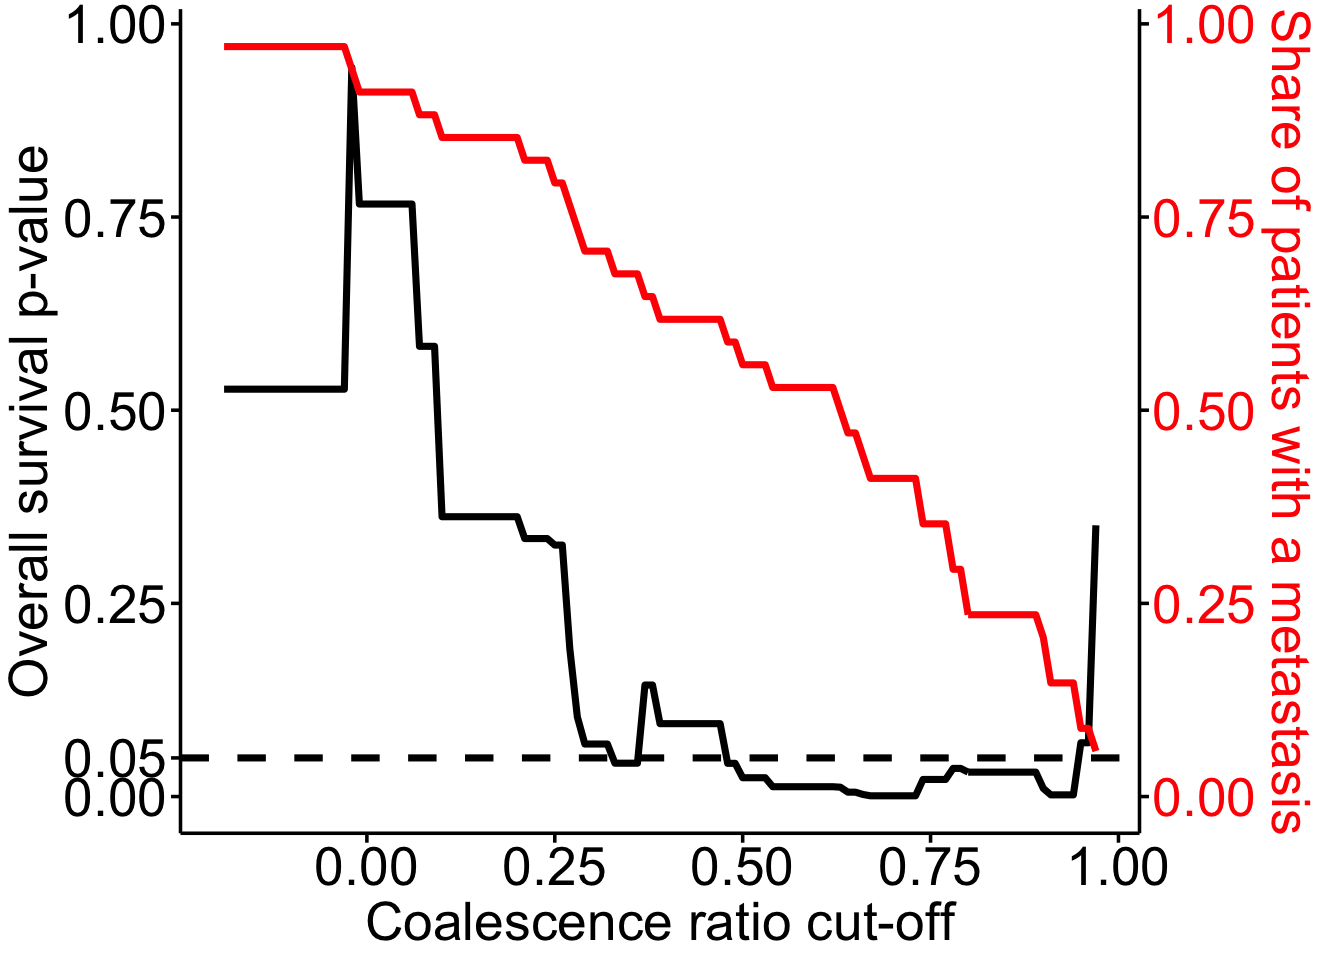

In [85]:
rtable %>%
  ggplot(aes(r, p_value)) +
  geom_line(size = 2) +
  geom_line(aes(r, imp_ratio), color = "red", size = 2) +  
  geom_hline(yintercept = 0.05, linetype = 2, size = 2) +
  scale_y_continuous(
    # annotate p-value of 0.05
    breaks = c(0, 0.05, 0.25, 0.5, 0.75, 1),

    # Features of the first axis
    name = "Overall survival p-value",

    # Add a second axis and specify its features
    sec.axis = sec_axis(trans = ~ . * 1, name = "Share of patients with a metastasis")
  ) +
    labs(x="Coalescence ratio cut-off") +
    theme_martin() +
    theme(axis.title.y.right = element_text(color = "red"), axis.text.y.right = element_text(color = "red")) 
ggsave("../plots/Figure5/Extended_Data_Fig8E.pdf", height=11, width=18)

## Cox regression of survival

In [86]:
renamed_status <- status %>% 
    rename(
        "Coalescence ratio" = r, "Age at diagnosis" = age,
        "Sex" = sex, "Smoking status" = smoking,
        "Lymph node metastases" = n_stage, "Time between tumors" = interval,
        "Size of largest tumor" = size,
        "Tumor spread" = location
    )
cox_multi_pfs <- coxph(Surv(pfs, pf_survival) ~ `Age at diagnosis` + `Sex` + `Smoking status` +
    `Lymph node metastases` + `Time between tumors` + `Size of largest tumor` +
    `Tumor spread` + `Coalescence ratio`, data = renamed_status, x = TRUE)

Warning message in .get_data(model, data = data):
"The `data` argument is not provided. Data will be extracted from model fit."


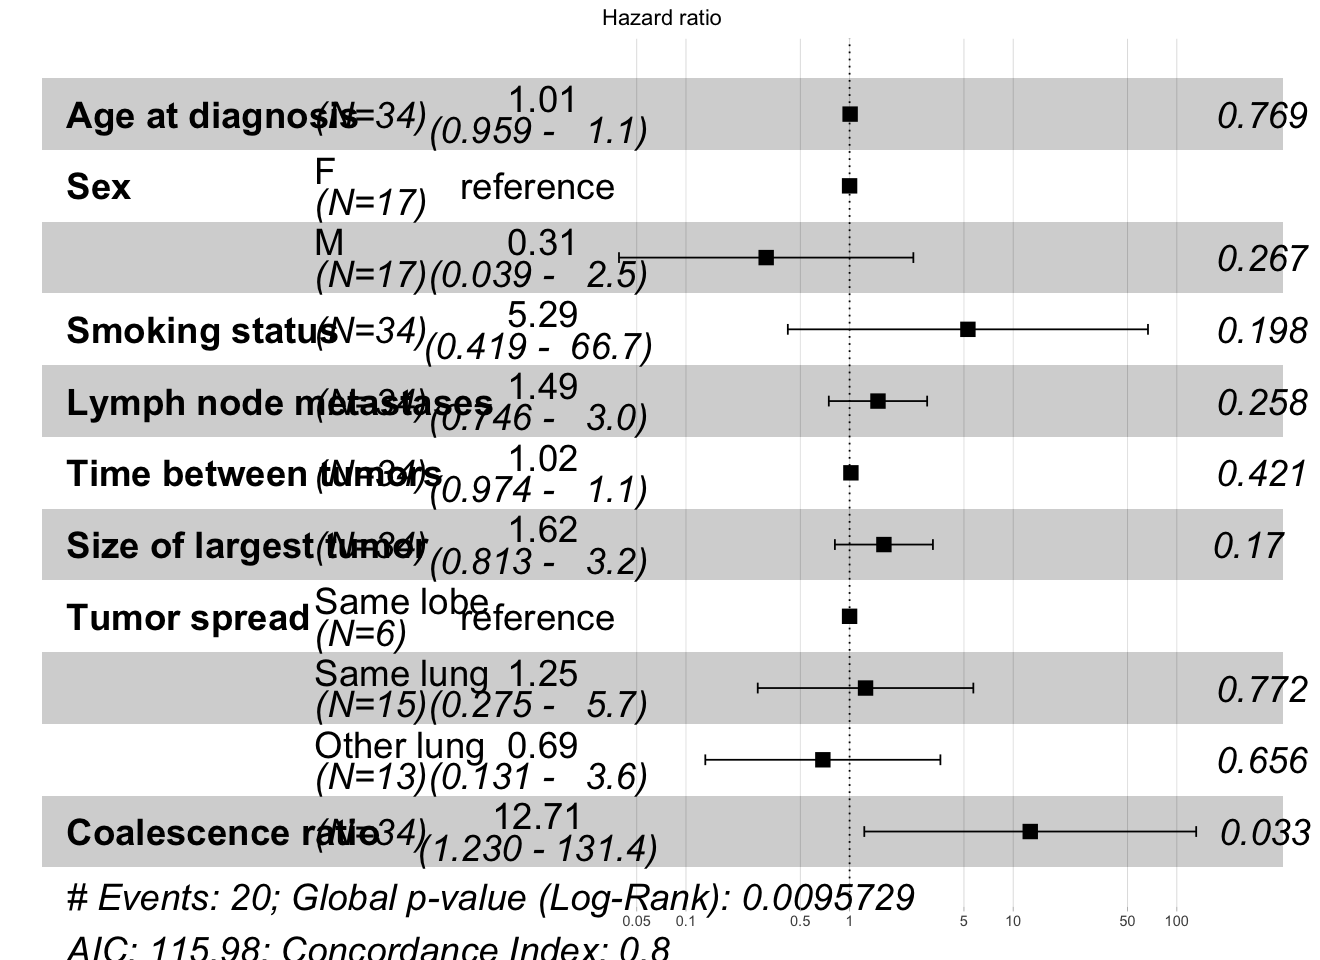

In [87]:
ggforest(cox_multi_pfs, fontsize = 2) 
ggsave("../plots/Figure5/Extended_Data_Fig8f.pdf", height=12, width=20)

Plotting cox model in 3D

In [88]:
cox_multi_oldnames <- coxph(Surv(pfs, pf_survival) ~ age + sex + smoking + n_stage + interval + size + location +r, data = status, x = TRUE)

In [89]:
library(Matrix)
pdf(file="../plots/Figure5/Fig5H.pdf", width=7, height=7)
plot_surv_3Dsurface(
    time = "pfs",
    status = "pf_survival",
    variable = "r",
    data = status,
    col = "skyblue1",
    shade = 0.05,
    xlab = "Follow - up from 2nd Surgery (months)",
    ylab = "Progression free survival",
    zlab = "Coalescence ratio",
    model = cox_multi_oldnames
)
dev.off()


Attaching package: 'Matrix'


The following object is masked from 'package:ggtree':

    expand


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




pdf 
  2

## Coalescence ratio of HNSCC

In [90]:
# directroy of the HNSCC results
dir_list <-  list.files("../data/hnscc/",
                        pattern= "_R$", full.names = TRUE)

In [91]:
# extract the absolute mean marker lengths
l <- lapply(dir_list, get_markerlengths)
hnscc_lengths <- bind_rows(l)

HN17



HN23



In [92]:
# finding length from normal for each marker
hnscc_lengths_from_normal <- hnscc_lengths %>%
    mutate(sample = str_remove(sample, "N"), subject = str_remove(subject, "N")) %>% 
    group_by(subject, marker) %>%
    mutate(length = length - length[str_detect(sample, "[:digit:]N1")]) %>%
    ungroup()

In [93]:
hnscc_lengths_from_normal %>%
    group_by(subject) %>%
    mutate(large_del = (length < (-1))) %>%
    count(large_del) %>%
    mutate(del_frac = n/sum(n)) %>% 
    filter(large_del, del_frac>0.1)

subject,large_del,n,del_frac
<chr>,<lgl>,<int>,<dbl>


In [94]:
# find samples
samples <- hnscc_lengths_from_normal$sample %>% unique

combos_wide <- combn(samples, m= 2) %>% as.data.frame()

## make combo table longer
combos_long <- data.frame(a=as.character(combos_wide[1,]), b=as.character(combos_wide[2,]))

## only use combintions from the same subject
combos <- combos_long %>% 
    mutate(sample_a=str_extract(a, "H[:digit:]+"),
          sample_b=str_extract(b, "H[:digit:]+"))  %>% 
    filter(sample_a==sample_b) %>% 
    dplyr::select(a, b)  


In [95]:
# calculate l1 distance and correlation for pars 
l1_comb <- lapply(1:nrow(combos), get_l1_r_for_combination, combos, hnscc_lengths_from_normal)
hnscc_tbl <- bind_rows(l1_comb) %>%
    mutate(divs=l1/9.43139014888478e-05) 

In [96]:
 samples <- hnscc_lengths_from_normal$sample %>%
            unique() %>%
            str_subset("H17")

      combos_wide <- combn(samples, m = 2) %>% as.data.frame()

      ## make combo table longer
      combos_long <- data.frame(a = as.character(combos_wide[1, ]), b = as.character(combos_wide[2, ]))

## Bootstrapping

Setting up functions for bootstrapping the divisions from zygote to MRCA

In [97]:
# finding combination of samples to bootstrap

get_boot_combos <- function(markerlengths, subject_i) {
      # find samples
      samples <- markerlengths$sample %>%
            unique() %>%
            str_subset(subject_i)

      combos_wide <- combn(samples, m = 2) %>% as.data.frame()

      ## make combo table longer
      combos_long <- data.frame(a = as.character(combos_wide[1, ]), b = as.character(combos_wide[2, ]))
}


In [98]:
# function to the find the MRCA of a specific marker combination

boot_mrca <- function(subject_i, subject_markers, n_markers, boot_combos) {
        
        marker_table <- subject_markers %>%
            slice_sample(n = n_markers, replace = TRUE) %>%
            unnest(data) %>%
            select(subject, sample, marker, length) %>%
            ungroup()

        l1_comb_boot <- lapply(1:nrow(boot_combos), get_l1_r_for_combination, boot_combos, marker_table)

        tbl_boot <- bind_rows(l1_comb_boot) %>%
            mutate(divs = l1 / 9.43139014888478e-05) %>%
            select(a, b, divs)

        tree <- plot_tree(subject_i, tbl_boot)
        tumors <- str_subset(tree$tip.label, "N", negate = TRUE)
        
        findMRCA(tree, tumors, type = "height")
        
    }

In [99]:
# function to plot the tree with a confidence interval around the MRCA 
plot_ci_tree <- function(subject_i, divs_tbl, mrca_boot) {

tree <- plot_tree(subject_i, divs_tbl)

tumors <- str_subset(tree$tip.label, "N", negate = TRUE)

# finding MRCA node and height of the tree with all markers
mrca_node <- findMRCA(tree, tumors)
mrca_height <- round(findMRCA(tree, tumors, type = "height"), 0)

# plotting tree
t <- ggtree(tree, size=1)

# annotating 5th and 95th percentile for confidence interval
t$data <- t$data %>%
  mutate(
    ci_05 = ifelse(node == mrca_node, quantile(mrca_boot, 0.025), NA),
    ci_95 = ifelse(node == mrca_node, quantile(mrca_boot, 0.975), NA),
    CI = "95 % CI", label = str_remove_all(label, subject_i)
  )

# finding maximum x value (could also be the end of the CI) to expand coord system
    max_x <- max(t$data$x)
    max_ci <- max(t$data$ci_95, na.rm=TRUE)
    abs_max <- pmax(max_x, max_ci)

t <- t + #geom_segment(aes(x=ci_05, y=y, xend=ci_95, yend=y, color=CI),  size=5,  alpha=0.2,
         #        show.legend = TRUE) +
    geom_point2(data= .  %>%  filter(str_detect(label, "M|P")), 
                aes(x, y), size=6, color= wes_palette("Zissou1")[1]) +
    geom_point2(data= .  %>%  filter(node==mrca_node), 
                size=6, color=wes_palette("Zissou1")[5]) +
    geom_tiplab(size = 8, color = "black", hjust = 0.5, offset=-200) +
    scale_colour_manual(na.translate = F, name="CI",guide = guide_legend(override.aes = list(shape = c(19))),
                      values=c(wes_palette("Zissou1")[5])) +
    labs(x = "Divisions from zygote") +
      theme(
        axis.line.y = element_line(size = 1.5),
        axis.title.y = element_text(size = 35, color = "black"),
        axis.text.y = element_text(size = 35, color = "black"),
        axis.ticks.y = element_line(color = "black", size = 1),
        axis.ticks.length.y = unit(0.2, "cm"), plot.title = element_text(size = 35),
        text = element_text(size = 18, color = "black"), axis.line = element_line(color = "black", size = 1),
        legend.position = c(0.3, 0.6), legend.title = element_blank(), legend.text = element_text(size = 20)
      ) +
    xlim(0, abs_max * 1.1) +
    coord_flip() +
    scale_y_reverse() +
    scale_x_reverse() +
    ylim(0.5, 3.3) 

mrca_annotation <- ggplot() +
    geom_blank() +
    annotate(geom = "point", x = 0.8, y = 1, color = wes_palette("Zissou1")[5], size=6) +
    annotate(geom = "text", x = 0.9, y = 1, 
          label = paste0("Tumor MRCA at division ", mrca_height), size=5, 
          hjust=0) +
    theme_void() +
    xlim(0.5, 3.3) 

t / plot_spacer() / mrca_annotation +
  plot_layout(heights = c(7, -0.1, 1))   

ggsave(paste0("../plots/Figure5/", subject_i, "_tree.pdf"), height=11, width=5)

}

In [100]:
bootstrap_mrca <- function(subject_i, markerlengths, divs_tbl) {
    
    # nesting markers
    subject_markers <- markerlengths %>%
        filter(subject == subject_i) %>% 
        group_by(subject, marker) %>% 
        nest %>% 
        ungroup 

    # getting combos to bootstrap through
    boot_combos <- get_boot_combos(markerlengths, subject_i)

    n_markers <- length(unique(subject_markers$marker))

    mrca_boot <- replicate(1, boot_mrca(subject_i, subject_markers, n_markers, boot_combos))

    plot_ci_tree(subject_i, divs_tbl, mrca_boot)
}

In [101]:
subjects <- unique(hnscc_lengths_from_normal$subject)

parallel::mclapply(subjects, bootstrap_mrca, hnscc_lengths_from_normal, hnscc_tbl)

[[1]]
[1] "../plots/Figure5/H17_tree.pdf"

[[2]]
[1] "../plots/Figure5/H23_tree.pdf"

Number of independent tumor pairs

In [102]:
nrow(interpatient_cor)

[1] 1973

Number of primary tumor - metastasis pairs in the CRC cohort

In [103]:
nrow(crc_cor)

[1] 537

Number of CRC patients with distant metastases

In [104]:
crc_cor %>%
    mutate(subject = str_extract(a, "C[:digit:]+")) %>%
    pull(subject) %>%
    n_distinct()

[1] 27

CRC primary - met pairs classified as metastases

In [105]:
correctly_classified <- crc_cor %>%
    filter(r > 0.52) %>%
    nrow()
correctly_classified/537*100

[1] 90.31657

Multifocal lung cancer pairs classified as metastases

In [106]:
lung_mets <- clinical_cor %>%
    filter(r > 0.52) %>%
    nrow()
lung_mets
lung_mets / 44 * 100

[1] 26

[1] 59.09091

Fisher's test on the classifications agreement

In [107]:
lung_mrca_table %>%
      pivot_longer(2:5, names_to = "mrca", values_to = "divs") %>%
      filter(mrca != "all_mrca", !is.na(divs)) %>%
      mutate(
            tumor_a = str_split(mrca, "_") %>% purrr::map(1) %>% toupper(),
            tumor_b = str_split(mrca, "_") %>% purrr::map(2) %>% toupper()
      ) %>%
      select(-mrca) %>%
      left_join(cor) %>%
      mutate(coal_r = ifelse(r > 0.52, "cr_met", "cr_ind"),
      divs = ifelse(divs > 520, "divs_met", "divs_ind")) %>% 
      group_by(divs) %>%
      count(coal_r) %>%
      pivot_wider(names_from = 2, values_from = 3) %>%
      mutate(cr_ind=replace_na(cr_ind, 0)) %>% 
      column_to_rownames("divs") %>% 
      fisher_test()

Joining with `by = join_by(subject, tumor_a, tumor_b)`


,n,p,p.signif
,<int>,<dbl>,<chr>
1,44,1.57e-06,****


Number of pairs in the intrapatient CR comparisons

In [108]:
interpatient_tbl %>%
    count(cohort)

cohort,n
<fct>,<int>
LUAD,1973
CRC,43358


Number of datapoints in Fig5d

In [109]:
combined_table %>% 
    count(cohort)

cohort,n
<fct>,<int>
inter,1973
crc,537
intra,44
